# 1. Problem Formulation

1. We want to understand the factors that affect the Rents
2. We want to be able to predict Rents based on our data/variables

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Loading the Raw Data

In [2]:
# Loading the data
raw_data = pd.read_csv(r"C:\Users\Tahmida\Downloads\dubai_properties.csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(10)

(73742, 17)


Address    Rent  Beds  Baths  \
0  The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2            Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3  Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                    West Yas, Yas Island, Abu Dhabi  350000     5      7   
5  Reflection, Shams Abu Dhabi, Al Reem Island, A...   75000     1      1   
6                Water's Edge, Yas Island, Abu Dhabi   65000     1      1   
7                        Noya, Yas Island, Abu Dhabi  170000     3      4   
8              Ansam 3, Ansam, Yas Island, Abu Dhabi   75000     1      2   
9  Marina Heights I, Marina Heights, Marina Squar...  160000     2      3   

        Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0  Apartment          1785      69.467787        Medium    Yearly   
1  Apartment          1422      98.452883        Medium    Yearly   
2  Apartment          1314      75.342466        Medium    Yearly   
3  Penthouse          3843      57.246942          High    Yearly   
4      Villa          6860      51.020408          High    Yearly   
5  Apartment           706     106.232295        Medium    Yearly   
6  Apartment           698      93.123209           Low    Yearly   
7  Townhouse          1989      85.470085          High    Yearly   
8  Apartment           886      84.650113        Medium    Yearly   
9  Apartment          1430     111.888112          High    Yearly   

    Furnishing   Purpose Posted_date  Age_of_listing_in_days        Location  \
0  Unfurnished  For Rent    3/7/2024                      45  Al Reem Island   
1  Unfurnished  For Rent    3/8/2024                      44      Yas Island   
2    Furnished  For Rent   3/21/2024                      31   Al Raha Beach   
3  Unfurnished  For Rent   2/24/2024                      57  Al Reem Island   
4  Unfurnished  For Rent   2/16/2024                      65      Yas Island   
5    Furnished  For Rent  12/12/2023                     131  Al Reem Island   
6  Unfurnished  For Rent   3/11/2024                      41      Yas Island   
7  Unfurnished  For Rent   2/22/2024                      59      Yas Island   
8  Unfurnished  For Rent    4/5/2024                      16      Yas Island   
9  Unfurnished  For Rent    4/5/2024                      16  Al Reem Island   

        City   Latitude  Longitude  
0  Abu Dhabi  24.493598  54.407841  
1  Abu Dhabi  24.494022  54.607372  
2  Abu Dhabi  24.485931  54.600939  
3  Abu Dhabi  24.493598  54.407841  
4  Abu Dhabi  24.494022  54.607372  
5  Abu Dhabi  24.493598  54.407841  
6  Abu Dhabi  24.494022  54.607372  
7  Abu Dhabi  24.494022  54.607372  
8  Abu Dhabi  24.494022  54.607372  
9  Abu Dhabi  24.493598  54.407841

# 3. Data Preprocessing

## 3.1. EDA 

In [3]:
raw_data.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [5]:
raw_data.describe()

Rent          Beds         Baths   Area_in_sqft  Rent_per_sqft  \
count  7.374200e+04  73742.000000  73742.000000   73742.000000   73742.000000   
mean   1.479250e+05      2.162811      2.650213    2054.053552      88.057754   
std    3.069658e+05      1.578155      1.632997    3003.919252      66.534400   
min    0.000000e+00      0.000000      1.000000      74.000000       0.000000   
25%    5.499900e+04      1.000000      2.000000     850.000000      39.977778   
50%    9.800000e+04      2.000000      2.000000    1334.000000      71.428571   
75%    1.700000e+05      3.000000      3.000000    2130.000000     118.483412   
max    5.500000e+07     12.000000     11.000000  210254.000000    2182.044888   

       Age_of_listing_in_days      Latitude     Longitude  
count            73742.000000  73023.000000  73023.000000  
mean                74.261547     24.918929     55.053133  
std                 72.346767      0.569356      0.653722  
min                 11.000000     15.175847     43.351928  
25%                 30.000000     24.493598     54.607372  
50%                 52.000000     25.078641     55.238209  
75%                 95.000000     25.197978     55.367138  
max               2276.000000     25.920310     56.361294

In [6]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Address :4515
The number of values for feature Rent :2099
The number of values for feature Beds :13 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
The number of values for feature Baths :11 -- [ 1  2  3  4  5  6  7  8  9 10 11]
The number of values for feature Type :9 -- ['Apartment' 'Hotel Apartment' 'Penthouse' 'Residential Building'
 'Residential Floor' 'Residential Plot' 'Townhouse' 'Villa'
 'Villa Compound']
The number of values for feature Area_in_sqft :4964
The number of values for feature Rent_per_sqft :31328
The number of values for feature Rent_category :3 -- ['High' 'Low' 'Medium']
The number of values for feature Frequency :1 -- ['Yearly']
The number of values for feature Furnishing :2 -- ['Furnished' 'Unfurnished']
The number of values for feature Purpose :1 -- ['For Rent']
The number of values for feature Posted_date :544
The number of values for feature Age_of_listing_in_days :544
The number of values for feature Location :441
The number of 

## 3.2. Data Cleaning

In [7]:
raw_data.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [8]:
# filling null data with median

median_latitude = raw_data['Latitude'].median()
median_longitude = raw_data['Longitude'].median()

raw_data['Latitude'] = raw_data['Latitude'].fillna(median_latitude)
raw_data['Longitude'] = raw_data['Longitude'].fillna(median_longitude)

In [9]:
raw_data.isnull().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [10]:
raw_data = raw_data.drop(['Frequency', 'Purpose','Posted_date'], axis = 1)

In [11]:
raw_data.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Furnishing',
       'Age_of_listing_in_days', 'Location', 'City', 'Latitude', 'Longitude'],
      dtype='object')

## 3.3. Data Visualization 

In [12]:
corr = raw_data.corr(numeric_only = True)

In [13]:
corr["Rent"].sort_values(ascending = False)

Rent                      1.000000
Area_in_sqft              0.405517
Rent_per_sqft             0.348656
Beds                      0.309589
Baths                     0.080591
Latitude                  0.027401
Longitude                 0.007103
Age_of_listing_in_days    0.000885
Name: Rent, dtype: float64

In [14]:
corr.style.background_gradient(cmap='coolwarm')

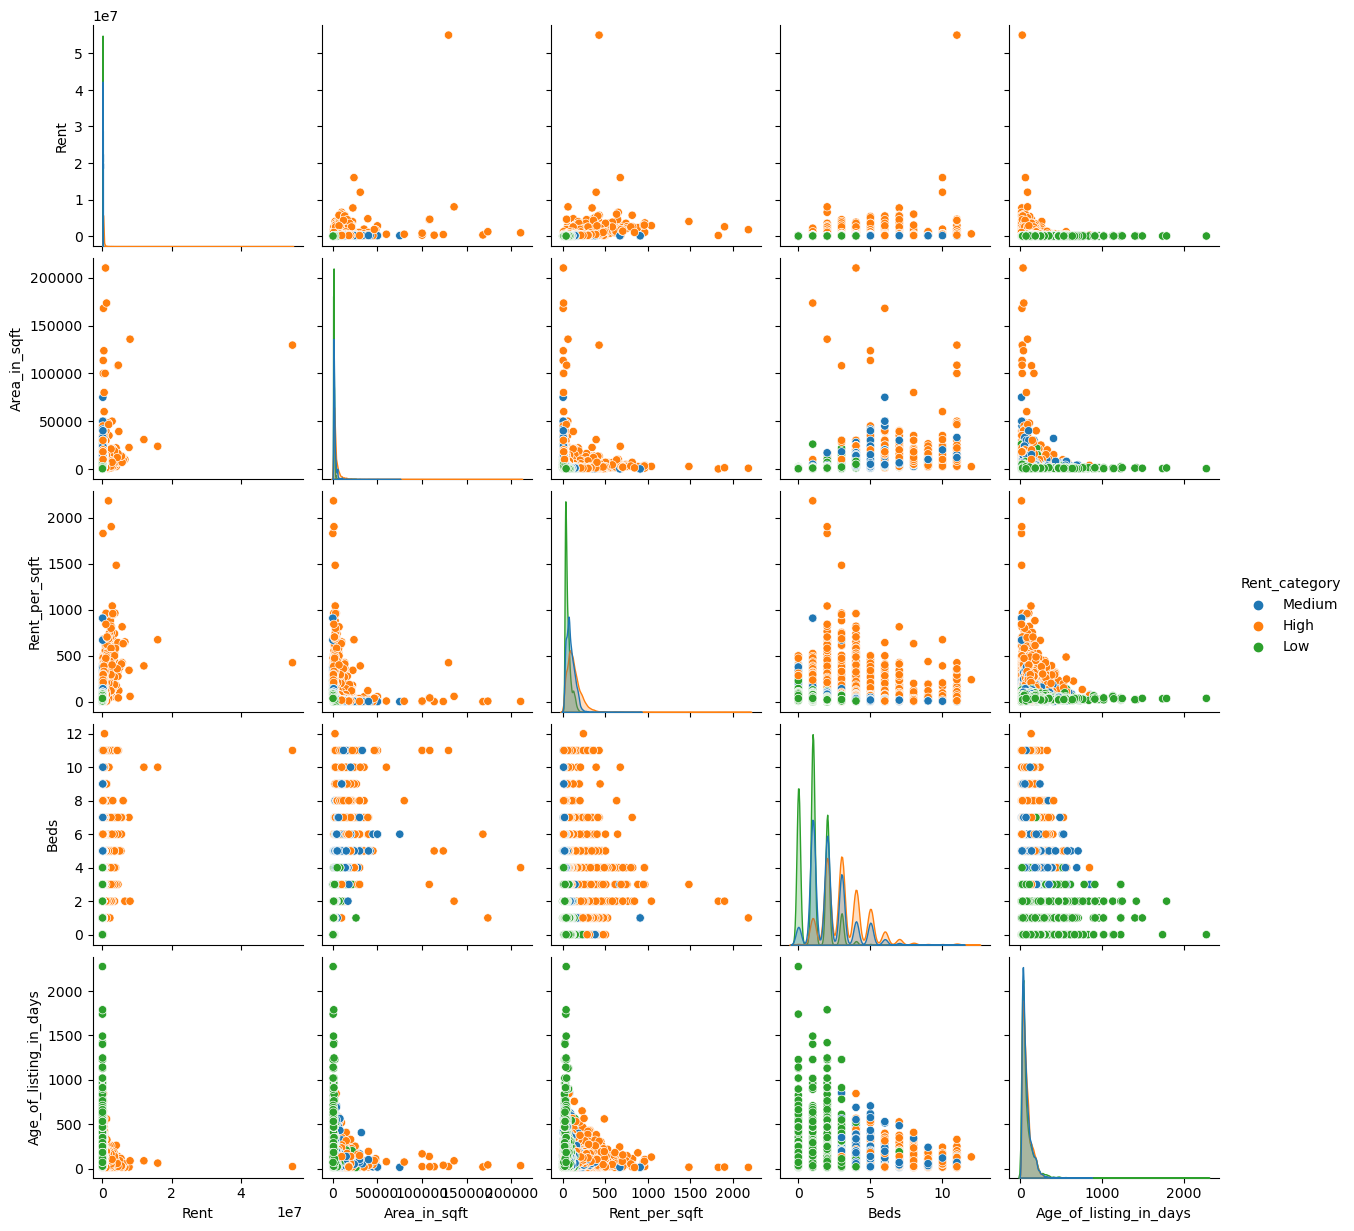

In [15]:
g = sns.pairplot(raw_data[['Rent','Area_in_sqft','Rent_per_sqft','Beds','Age_of_listing_in_days','Rent_category']], 
                 hue = 'Rent_category', height = 2.5)

<Axes: xlabel='Area_in_sqft', ylabel='Rent_per_sqft'>

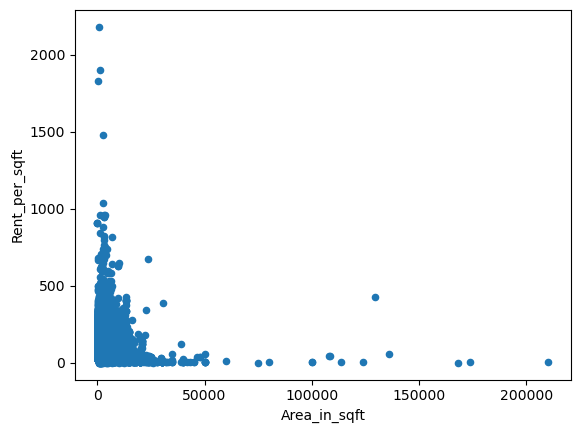

In [16]:
raw_data.plot(x = 'Area_in_sqft', y = 'Rent_per_sqft', kind = 'scatter', xlabel = 'Area_in_sqft' , ylabel = 'Rent_per_sqft')

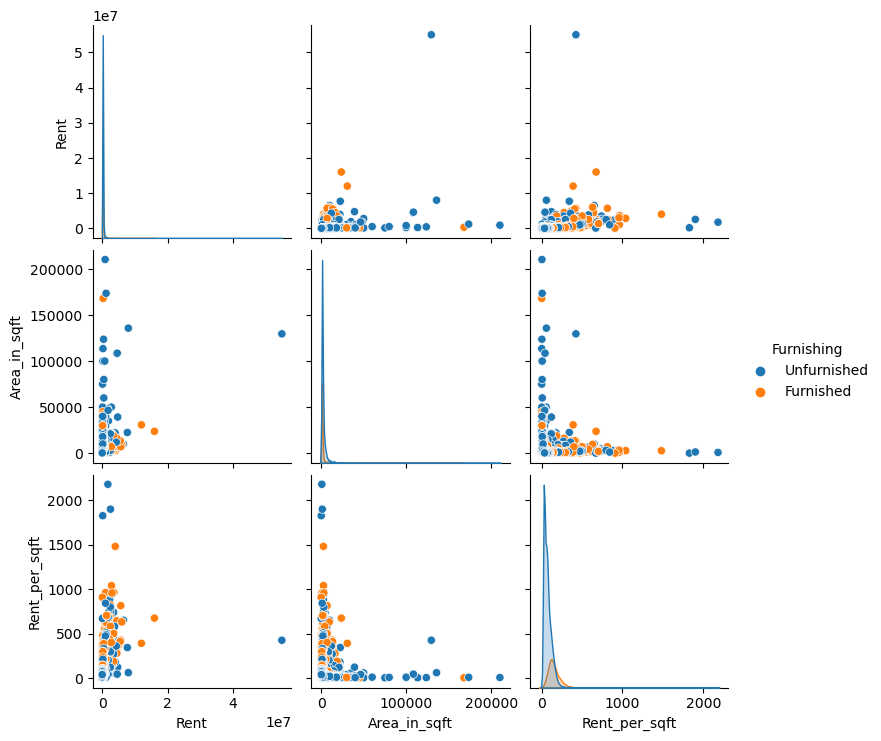

In [17]:
g = sns.pairplot(raw_data[['Rent','Area_in_sqft','Rent_per_sqft','Furnishing']], 
                 hue = 'Furnishing', height = 2.5)

<Axes: xlabel='Longitude', ylabel='Latitude'>

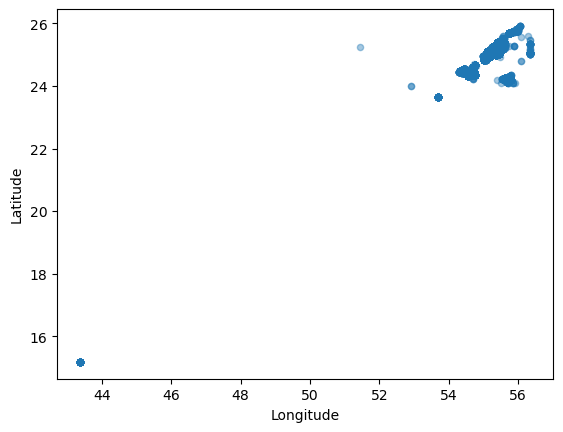

In [18]:
raw_data.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.4)

## 3.5. Investigating the categorical data 

Type          Rent
0             Apartment  1.096384e+05
1       Hotel Apartment  2.257042e+05
2             Penthouse  4.811372e+05
3  Residential Building  2.866282e+06
4     Residential Floor  1.409327e+06
5      Residential Plot  2.996498e+05
6             Townhouse  1.914537e+05
7                 Villa  2.838021e+05
8        Villa Compound  1.786589e+05

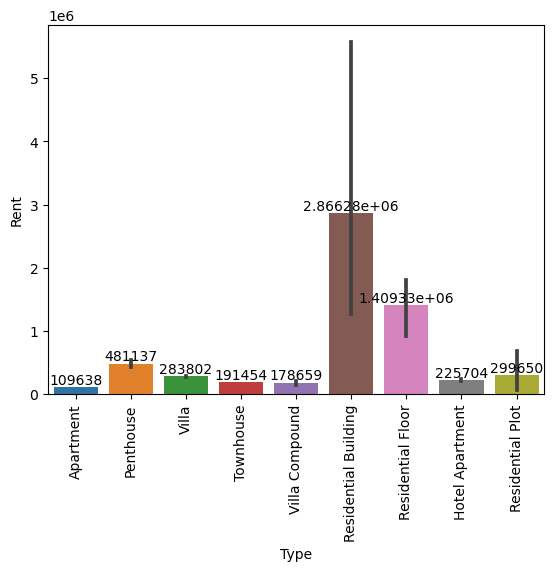

In [19]:
ax = sns.barplot(x="Type", y="Rent", data=raw_data)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=90)


raw_data[['Type', 'Rent']].groupby('Type', as_index = False).agg({'Rent':'mean'})

In [20]:
raw_data.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Furnishing',
       'Age_of_listing_in_days', 'Location', 'City', 'Latitude', 'Longitude'],
      dtype='object')

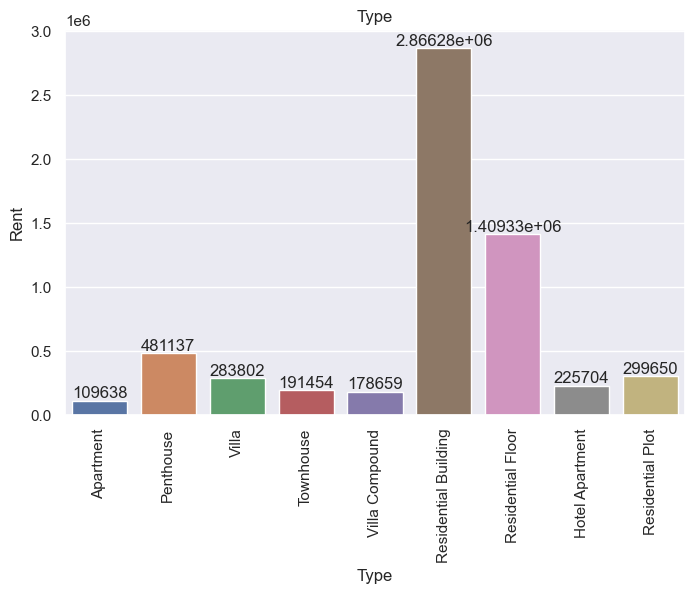

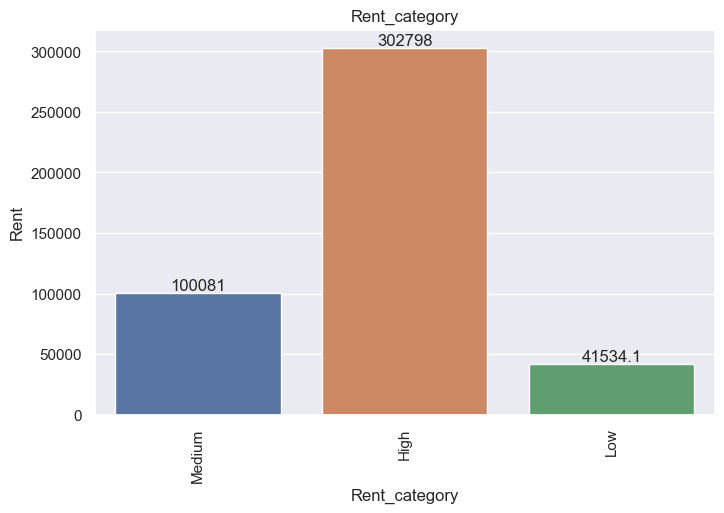

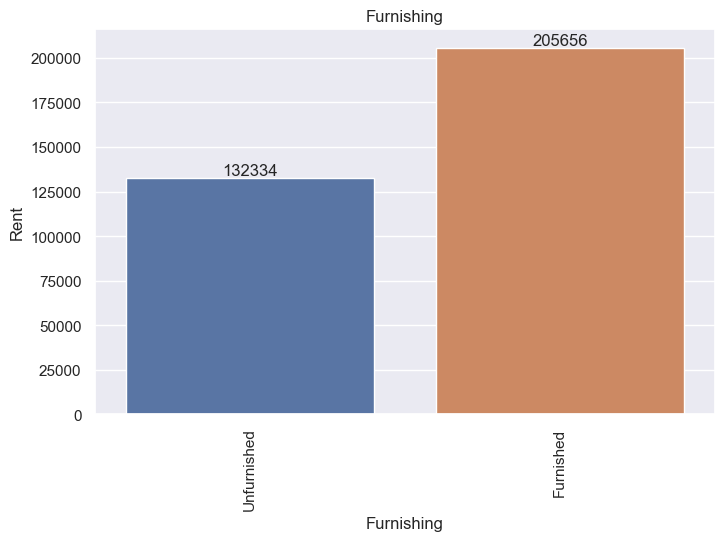

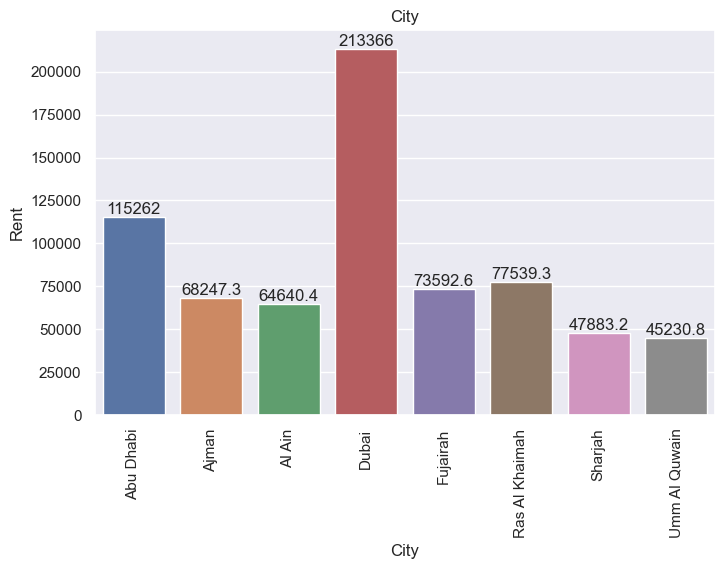

In [21]:
categories = ['Type','Rent_category', 'Furnishing', 'City']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.barplot(x=c, y="Rent", data=raw_data, ci=False) 
    for container in ax.containers:
        ax.bar_label(container)
        ax.tick_params(axis='x', labelrotation=90)
    plt.title(c)
    plt.show()

## 3.6. Investigating the distribution and outliers with Box plots 

In [22]:
#function to find lower and Upper bound in categorical column with respect to "Rent"

def low_up(df, column_name, type_list):
    
    # Dictionary to store the bounds for each type
    bounds_dict = {}

    for c in type_list:
        # Filter the data for the current type
        data = df[df[column_name] == c]
    
        Q1 = data['Rent'].quantile(0.25)
        Q3 = data['Rent'].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Storing bounds in the dictionary
        bounds_dict[c] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}

    # Print bounds for each type
    for c in type_list:
        print(f"{c}: Lower Bound = {bounds_dict[c]['Lower Bound']}, Upper Bound = {bounds_dict[c]['Upper Bound']}")


In [23]:
#function to find and replace outliers

def outlier_replace(df, column, name, lowerbound, upperbound):
    
    # Find rows with outlier
    filtered_data = df[(df[column] == name) & ((df['Rent'] < lowerbound) | (df['Rent'] > upperbound))]
    print(f"Outliers before replacement for {name}: {filtered_data.shape}")
        
    # Median rent for the current type
    median_rent = df.loc[df[column] == name, 'Rent'].median()

    # Replace values  lower than lowerbound or higher than upperbound with the median rent
    df.loc[(df[column] == name) & ((df['Rent'] < lowerbound) | (df['Rent'] > upperbound)), 'Rent'] = median_rent

    # Check if values are replaced
    filtered_data_after = df[(df[column] == name) & ((df['Rent'] < lowerbound) | (df['Rent'] > upperbound))]
    print(f"Outliers after replacement for {name}: {filtered_data_after.shape}")
    
    return df

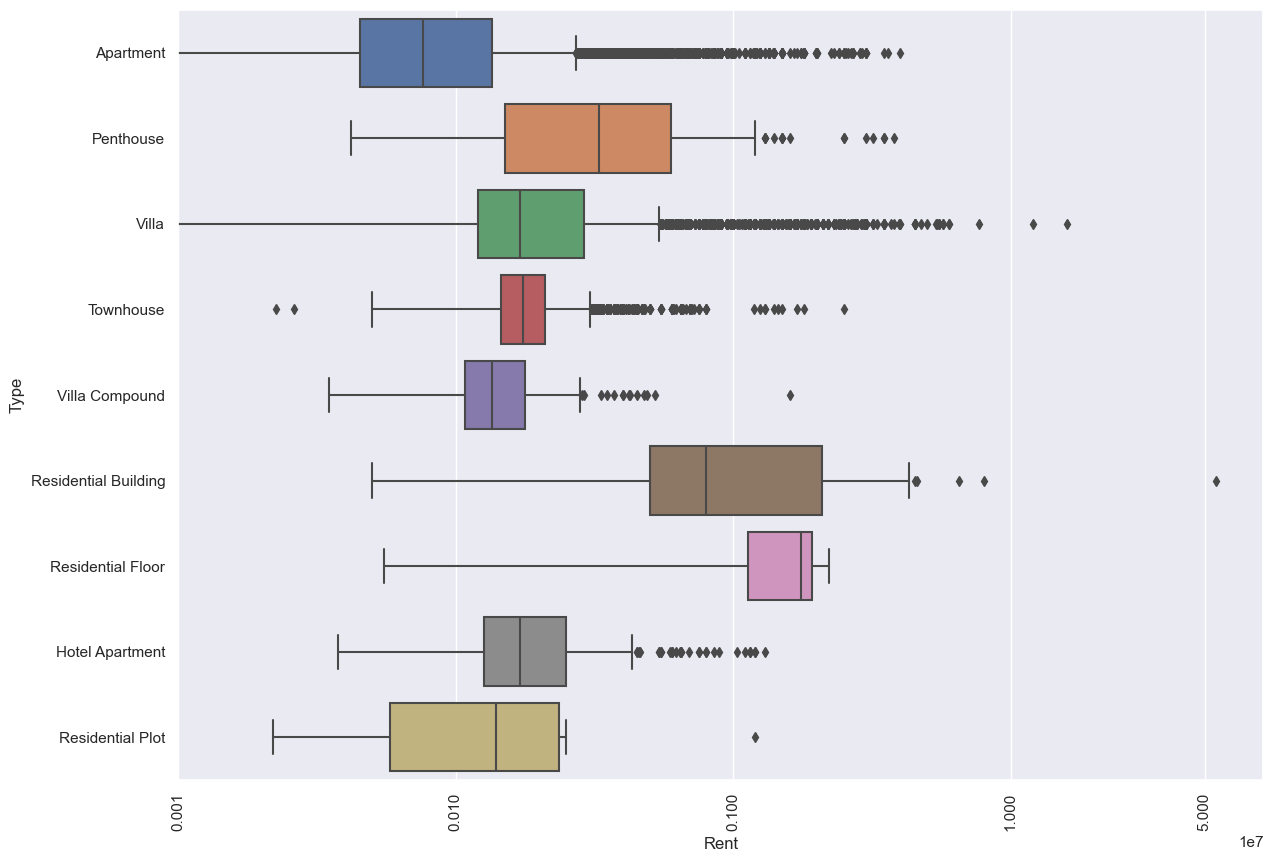

In [24]:
# Assuming 'raw_data' is your DataFrame
plt.figure(figsize=(14, 10))
ax = sns.boxplot(data=raw_data, x="Rent", y="Type")

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Set x-ticks at logarithmic intervals
ax.set_xticks([10000, 100000, 1000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.xticks(rotation=90)
plt.show()


In [25]:
raw_data['Type'].value_counts()

Apartment               56534
Villa                   12883
Townhouse                3421
Hotel Apartment           465
Penthouse                 270
Villa Compound            107
Residential Building       44
Residential Floor          12
Residential Plot            6
Name: Type, dtype: int64

In [26]:
#list of values in "Type"
type_cat = ["Apartment", "Villa", "Townhouse", "Hotel Apartment", "Penthouse", "Villa Compound", 
            "Residential Building", "Residential Floor", "Residential Plot"]

# function call(data_frame, column, value list)
low_up(raw_data, 'Type', type_cat)

Apartment: Lower Bound = -90000.0, Upper Bound = 270000.0
Villa: Lower Bound = -135000.0, Upper Bound = 545000.0
Townhouse: Lower Bound = 47500.0, Upper Bound = 307500.0
Hotel Apartment: Lower Bound = -59000.0, Upper Bound = 435400.0
Penthouse: Lower Bound = -517500.0, Upper Bound = 1262500.0
Villa Compound: Lower Bound = 2500.0, Upper Bound = 282500.0
Residential Building: Lower Bound = -1881250.0, Upper Bound = 4468750.0
Residential Floor: Lower Bound = -53842.5, Upper Bound = 3105657.5
Residential Plot: Lower Bound = -206812.5, Upper Bound = 499487.5


In [27]:
outlier_replace(raw_data, 'Type', 'Apartment', -90000, 270000)
outlier_replace(raw_data, 'Type', 'Penthouse', -517500, 1262500)
outlier_replace(raw_data, 'Type', 'Villa', -135000, 545000)
outlier_replace(raw_data, 'Type', 'Townhouse', 47500, 307500)
outlier_replace(raw_data, 'Type', 'Villa Compound', 2500, 282500)
outlier_replace(raw_data, 'Type', 'Residential Building', -1881250, 4468750)
outlier_replace(raw_data, 'Type', 'Hotel Apartment', -59000, 435400)
outlier_replace(raw_data, 'Type', 'Residential Plot', -206812, 499487)

Outliers before replacement for Apartment: (3311, 14)
Outliers after replacement for Apartment: (0, 14)
Outliers before replacement for Penthouse: (15, 14)
Outliers after replacement for Penthouse: (0, 14)
Outliers before replacement for Villa: (1114, 14)
Outliers after replacement for Villa: (0, 14)
Outliers before replacement for Townhouse: (200, 14)
Outliers after replacement for Townhouse: (0, 14)
Outliers before replacement for Villa Compound: (14, 14)
Outliers after replacement for Villa Compound: (0, 14)
Outliers before replacement for Residential Building: (5, 14)
Outliers after replacement for Residential Building: (0, 14)
Outliers before replacement for Hotel Apartment: (31, 14)
Outliers after replacement for Hotel Apartment: (0, 14)
Outliers before replacement for Residential Plot: (1, 14)
Outliers after replacement for Residential Plot: (0, 14)


Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
...                                                  ...     ...   ...    ...   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   
73739                  King Faisal Street, Umm Al Quwain   50000     3      4   
73740                           Al Maqtaa, Umm Al Quwain   37000     1      2   
73741                             Al Rass, Umm Al Quwain   11000     0      1   

            Type  Area_in_sqft  Rent_per_sqft Rent_category   Furnishing  \
0      Apartment          1785      69.467787        Medium  Unfurnished   
1      Apartment          1422      98.452883        Medium  Unfurnished   
2      Apartment          1314      75.342466        Medium    Furnished   
3      Penthouse          3843      57.246942          High  Unfurnished   
4          Villa          6860      51.020408          High  Unfurnished   
...          ...           ...            ...           ...          ...   
73737  Apartment           419      33.412888           Low  Unfurnished   
73738  Apartment           500      28.000000           Low  Unfurnished   
73739  Apartment          2000      25.000000           Low  Unfurnished   
73740  Apartment           989      37.411527           Low  Unfurnished   
73741  Apartment           300      36.666667           Low  Unfurnished   

       Age_of_listing_in_days              Location           City   Latitude  \
0                          45        Al Reem Island      Abu Dhabi  24.493598   
1                          44            Yas Island      Abu Dhabi  24.494022   
2                          31         Al Raha Beach      Abu Dhabi  24.485931   
3                          57        Al Reem Island      Abu Dhabi  24.493598   
4                          65            Yas Island      Abu Dhabi  24.494022   
...                       ...                   ...            ...        ...   
73737                     129            Al Salamah  Umm Al Quwain  25.493412   
73738                     129  Umm Al Quwain Marina  Umm Al Quwain  25.527959   
73739                     110    King Faisal Street  Umm Al Quwain  25.078641   
73740                     181             Al Maqtaa  Umm Al Quwain  25.078641   
73741                      69               Al Rass  Umm Al Quwain  25.078641   

       Longitude  
0      54.407841  
1      54.607372  
2      54.600939  
3      54.407841  
4      54.607372  
...          ...  
73737  55.575994  
73738  55.606527  
73739  55.238209  
73740  55.238209  
73741  55.238209  

[73742 rows x 14 columns]

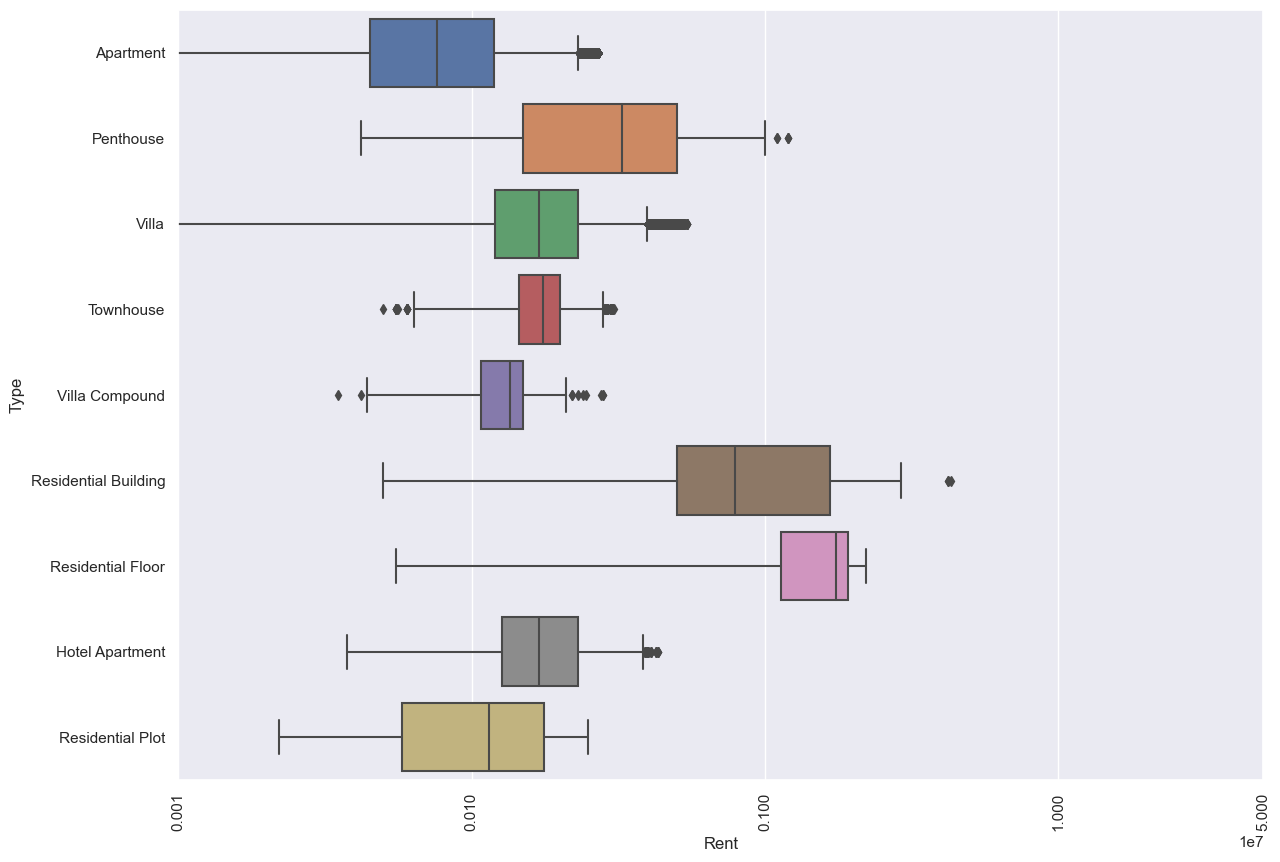

In [28]:
# Assuming 'raw_data' is your DataFrame
plt.figure(figsize=(14, 10))
ax = sns.boxplot(data=raw_data, x="Rent", y="Type")

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Set x-ticks at logarithmic intervals
ax.set_xticks([10000, 100000, 1000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.xticks(rotation=90)
plt.show()

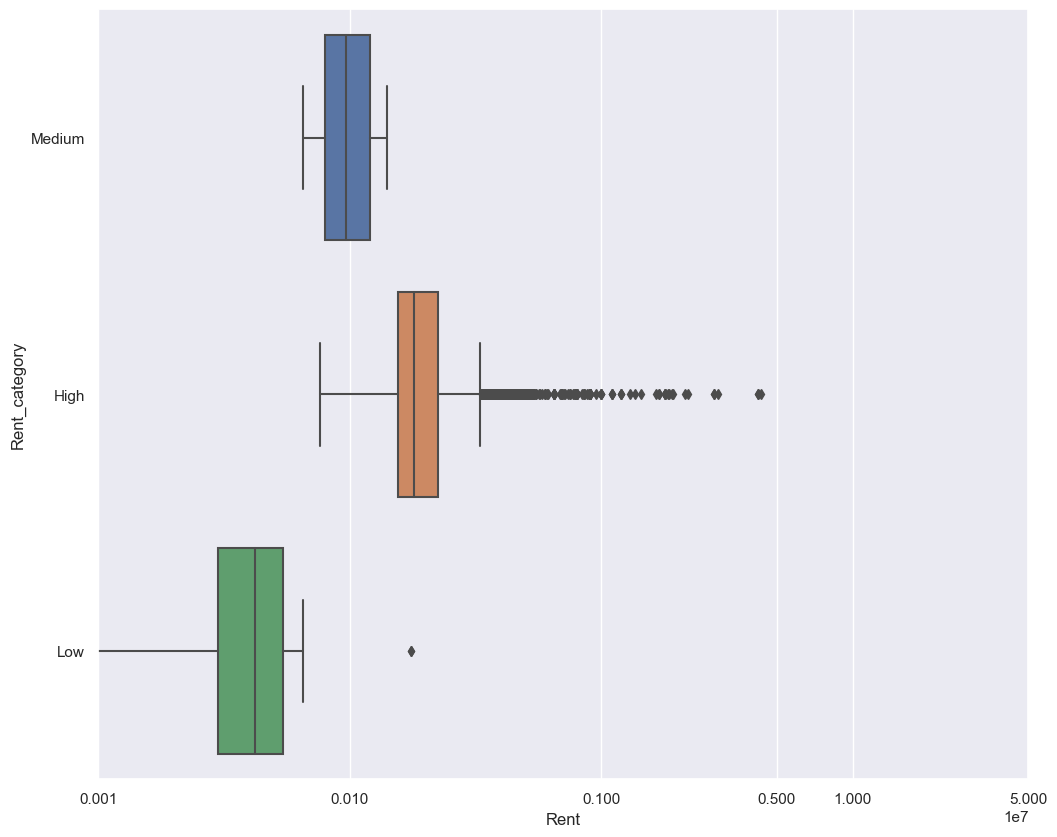

In [29]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=raw_data, x="Rent", y="Rent_category")

# x-axis to a logarithmic scale
ax.set_xscale('log')

# x-ticks at logarithmic intervals
ax.set_xticks([10000, 100000, 1000000, 5000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.show()

In [30]:
raw_data['Rent_category'].value_counts()

Medium    25088
High      24407
Low       24247
Name: Rent_category, dtype: int64

In [31]:
#list of values in "Rent_category"
Rent_cat_cat = ["Medium", "High", "Low"]

# function call(data_frame, column, value list)
low_up(raw_data, 'Rent_category', Rent_cat_cat)

Medium: Lower Bound = 20000.0, Upper Bound = 180000.0
High: Lower Bound = 49997.5, Upper Bound = 330001.5
Low: Lower Bound = -5998.5, Upper Bound = 89997.5


In [32]:
outlier_replace(raw_data, 'Rent_category', 'High', -25000, 495000)

Outliers before replacement for High: (263, 14)
Outliers after replacement for High: (0, 14)


Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
...                                                  ...     ...   ...    ...   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   
73739                  King Faisal Street, Umm Al Quwain   50000     3      4   
73740                           Al Maqtaa, Umm Al Quwain   37000     1      2   
73741                             Al Rass, Umm Al Quwain   11000     0      1   

            Type  Area_in_sqft  Rent_per_sqft Rent_category   Furnishing  \
0      Apartment          1785      69.467787        Medium  Unfurnished   
1      Apartment          1422      98.452883        Medium  Unfurnished   
2      Apartment          1314      75.342466        Medium    Furnished   
3      Penthouse          3843      57.246942          High  Unfurnished   
4          Villa          6860      51.020408          High  Unfurnished   
...          ...           ...            ...           ...          ...   
73737  Apartment           419      33.412888           Low  Unfurnished   
73738  Apartment           500      28.000000           Low  Unfurnished   
73739  Apartment          2000      25.000000           Low  Unfurnished   
73740  Apartment           989      37.411527           Low  Unfurnished   
73741  Apartment           300      36.666667           Low  Unfurnished   

       Age_of_listing_in_days              Location           City   Latitude  \
0                          45        Al Reem Island      Abu Dhabi  24.493598   
1                          44            Yas Island      Abu Dhabi  24.494022   
2                          31         Al Raha Beach      Abu Dhabi  24.485931   
3                          57        Al Reem Island      Abu Dhabi  24.493598   
4                          65            Yas Island      Abu Dhabi  24.494022   
...                       ...                   ...            ...        ...   
73737                     129            Al Salamah  Umm Al Quwain  25.493412   
73738                     129  Umm Al Quwain Marina  Umm Al Quwain  25.527959   
73739                     110    King Faisal Street  Umm Al Quwain  25.078641   
73740                     181             Al Maqtaa  Umm Al Quwain  25.078641   
73741                      69               Al Rass  Umm Al Quwain  25.078641   

       Longitude  
0      54.407841  
1      54.607372  
2      54.600939  
3      54.407841  
4      54.607372  
...          ...  
73737  55.575994  
73738  55.606527  
73739  55.238209  
73740  55.238209  
73741  55.238209  

[73742 rows x 14 columns]

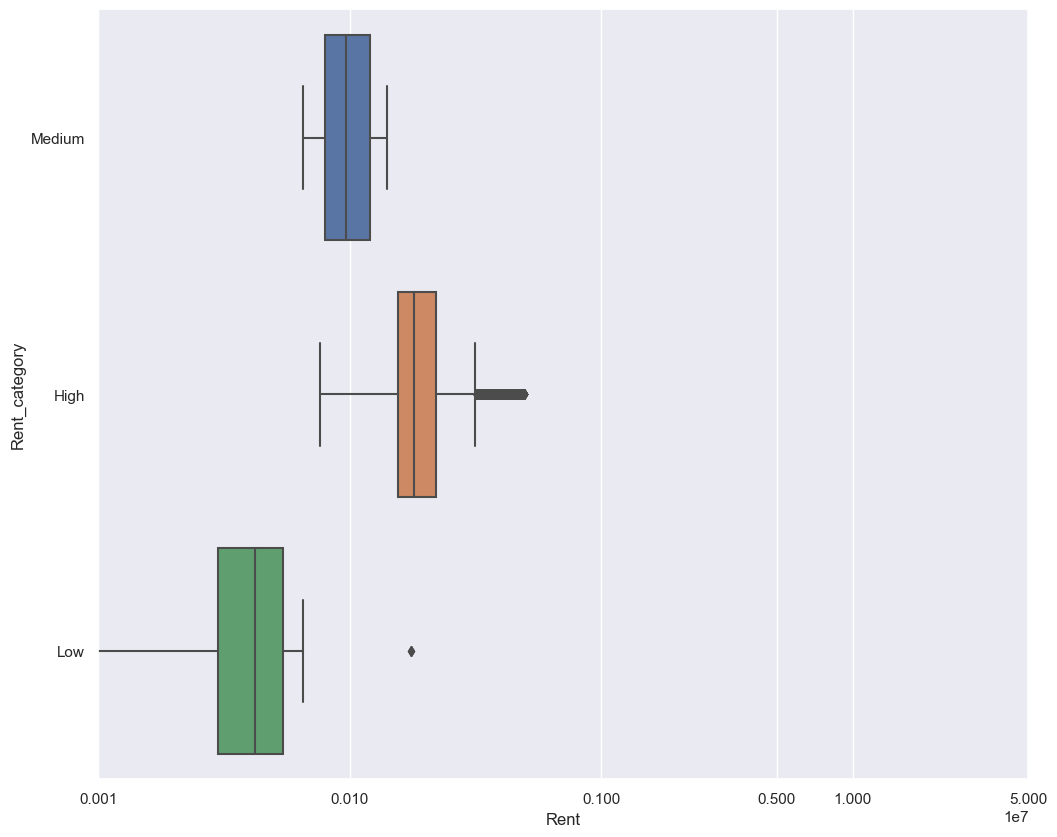

In [33]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=raw_data, x="Rent", y="Rent_category")

# x-axis to a logarithmic scale
ax.set_xscale('log')

# x-ticks at logarithmic intervals
ax.set_xticks([10000, 100000, 1000000, 5000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.show()

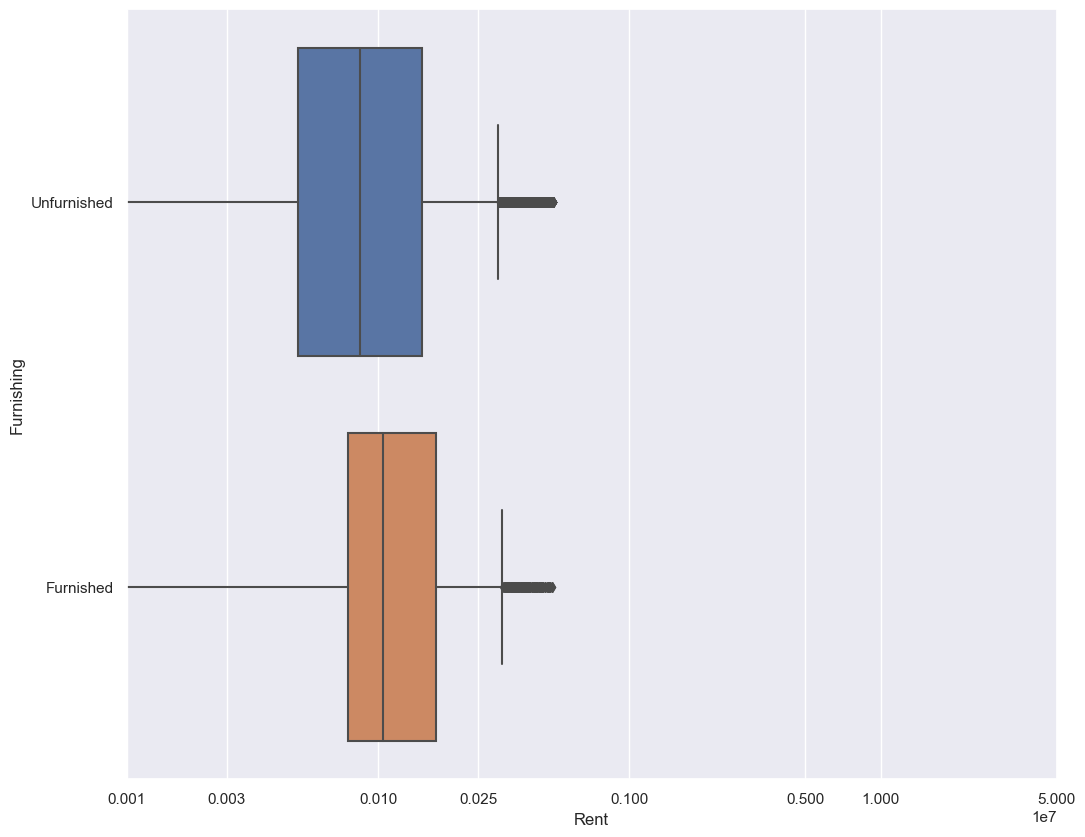

In [34]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=raw_data, x="Rent", y="Furnishing")

# x-axis to a logarithmic scale
ax.set_xscale('log')

# x-ticks at logarithmic intervals
ax.set_xticks([10000, 25000, 100000, 250000, 1000000, 5000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.show()

In [35]:
raw_data['Furnishing'].value_counts()

Unfurnished    58062
Furnished      15680
Name: Furnishing, dtype: int64

In [36]:
#list of values in "Rent_category"
Furnishing_cat = ["Unfurnished", "Furnished"]

# function call(data_frame, column, value list)
low_up(raw_data, 'Furnishing', Furnishing_cat)

Unfurnished: Lower Bound = -105000.0, Upper Bound = 303000.0
Furnished: Lower Bound = -65000.0, Upper Bound = 311000.0


In [37]:
outlier_replace(raw_data, 'Furnishing', 'Unfurnished', -105000, 303000)
outlier_replace(raw_data, 'Furnishing', 'Furnished', -65000, 311000)

Outliers before replacement for Unfurnished: (1510, 14)
Outliers after replacement for Unfurnished: (0, 14)
Outliers before replacement for Furnished: (268, 14)
Outliers after replacement for Furnished: (0, 14)


Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi   85000     5      7   
...                                                  ...     ...   ...    ...   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   
73739                  King Faisal Street, Umm Al Quwain   50000     3      4   
73740                           Al Maqtaa, Umm Al Quwain   37000     1      2   
73741                             Al Rass, Umm Al Quwain   11000     0      1   

            Type  Area_in_sqft  Rent_per_sqft Rent_category   Furnishing  \
0      Apartment          1785      69.467787        Medium  Unfurnished   
1      Apartment          1422      98.452883        Medium  Unfurnished   
2      Apartment          1314      75.342466        Medium    Furnished   
3      Penthouse          3843      57.246942          High  Unfurnished   
4          Villa          6860      51.020408          High  Unfurnished   
...          ...           ...            ...           ...          ...   
73737  Apartment           419      33.412888           Low  Unfurnished   
73738  Apartment           500      28.000000           Low  Unfurnished   
73739  Apartment          2000      25.000000           Low  Unfurnished   
73740  Apartment           989      37.411527           Low  Unfurnished   
73741  Apartment           300      36.666667           Low  Unfurnished   

       Age_of_listing_in_days              Location           City   Latitude  \
0                          45        Al Reem Island      Abu Dhabi  24.493598   
1                          44            Yas Island      Abu Dhabi  24.494022   
2                          31         Al Raha Beach      Abu Dhabi  24.485931   
3                          57        Al Reem Island      Abu Dhabi  24.493598   
4                          65            Yas Island      Abu Dhabi  24.494022   
...                       ...                   ...            ...        ...   
73737                     129            Al Salamah  Umm Al Quwain  25.493412   
73738                     129  Umm Al Quwain Marina  Umm Al Quwain  25.527959   
73739                     110    King Faisal Street  Umm Al Quwain  25.078641   
73740                     181             Al Maqtaa  Umm Al Quwain  25.078641   
73741                      69               Al Rass  Umm Al Quwain  25.078641   

       Longitude  
0      54.407841  
1      54.607372  
2      54.600939  
3      54.407841  
4      54.607372  
...          ...  
73737  55.575994  
73738  55.606527  
73739  55.238209  
73740  55.238209  
73741  55.238209  

[73742 rows x 14 columns]

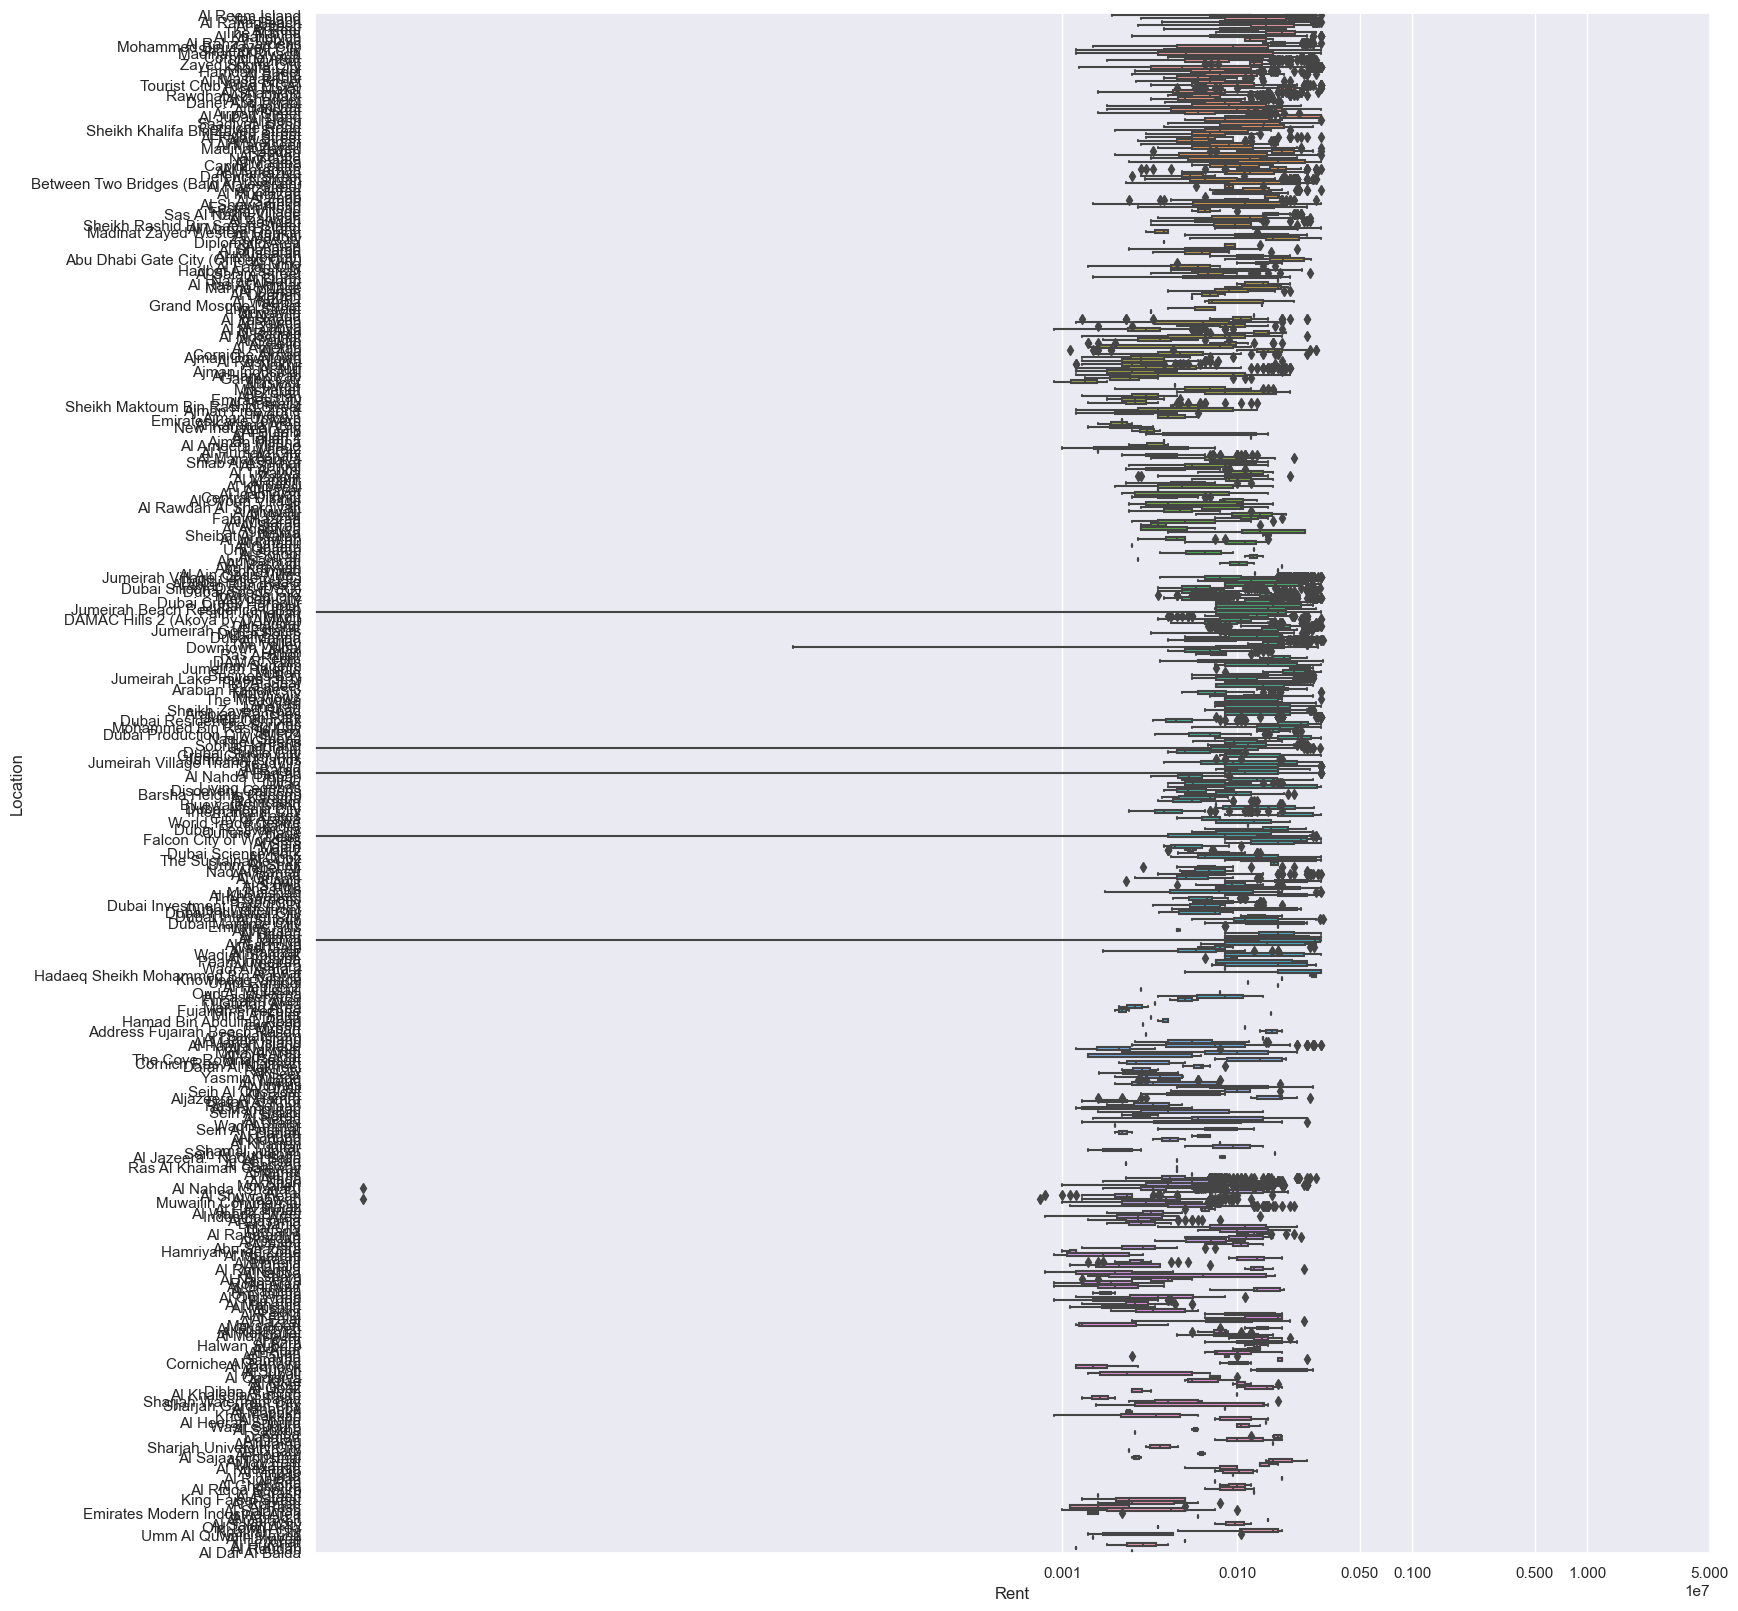

In [38]:
plt.figure(figsize=(18, 20))
ax = sns.boxplot(data=raw_data, x="Rent", y="Location")

# x-axis to a logarithmic scale
ax.set_xscale('log')

# x-ticks at logarithmic intervals
ax.set_xticks([10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.show()

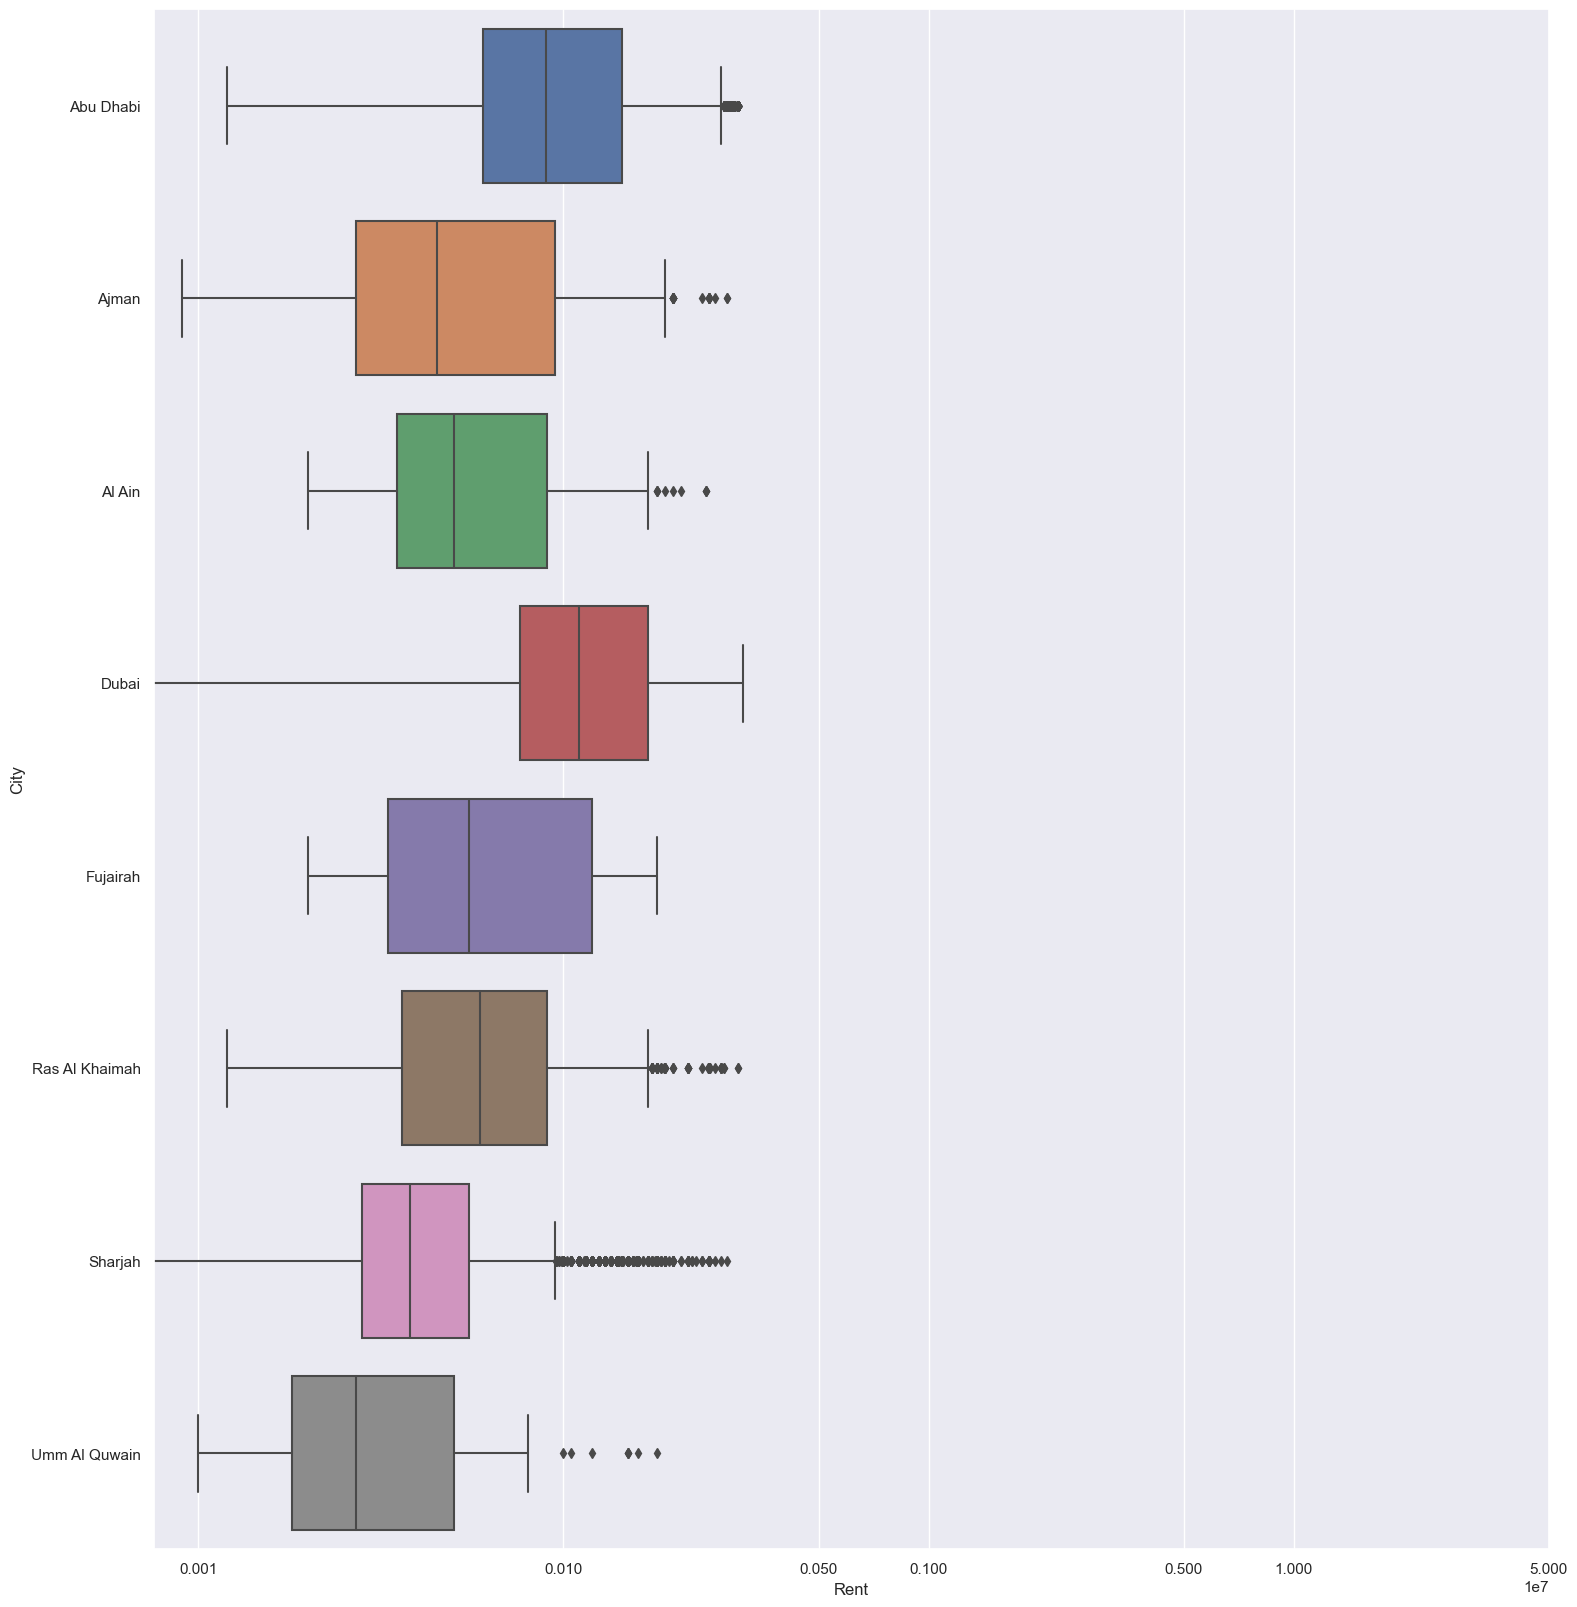

In [39]:
plt.figure(figsize=(18, 20))
ax = sns.boxplot(data=raw_data, x="Rent", y="City")

# x-axis to a logarithmic scale
ax.set_xscale('log')

# x-ticks at logarithmic intervals
ax.set_xticks([10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.show()

In [40]:
raw_data['City'].value_counts()

Dubai             34250
Abu Dhabi         23324
Sharjah            9516
Ajman              4704
Al Ain             1040
Ras Al Khaimah      816
Umm Al Quwain        65
Fujairah             27
Name: City, dtype: int64

In [41]:
#list of values in "City"
City_cat = ["Dubai", "Abu Dhabi", "Sharjan", "Ajman", "Al Ain", "Ras Al Khaimah", "Umm Al Quwain", "Fujairah"]

# function call(data_frame, column, value list)
low_up(raw_data, 'City', City_cat)

Dubai: Lower Bound = -65000.0, Upper Bound = 311000.0
Abu Dhabi: Lower Bound = -67502.5, Upper Bound = 272501.5
Sharjan: Lower Bound = nan, Upper Bound = nan
Ajman: Lower Bound = -75000.0, Upper Bound = 197000.0
Al Ain: Lower Bound = -47500.0, Upper Bound = 172500.0
Ras Al Khaimah: Lower Bound = -45375.0, Upper Bound = 171625.0
Umm Al Quwain: Lower Bound = -30000.0, Upper Bound = 98000.0
Fujairah: Lower Bound = -97500.0, Upper Bound = 250500.0


In [42]:
outlier_replace(raw_data, 'City', 'Abu Dhabi', -67502, 272501)
outlier_replace(raw_data, 'City', 'Ajman', -75000, 197000)
outlier_replace(raw_data, 'City', 'Al Ain', -47500, 172500)
outlier_replace(raw_data, 'City', 'Ras Al Khaimah', -45375, 171625)
outlier_replace(raw_data, 'City', 'Umm Al Quwain', -30000, 98000)

Outliers before replacement for Abu Dhabi: (204, 14)
Outliers after replacement for Abu Dhabi: (0, 14)
Outliers before replacement for Ajman: (20, 14)
Outliers after replacement for Ajman: (0, 14)
Outliers before replacement for Al Ain: (9, 14)
Outliers after replacement for Al Ain: (0, 14)
Outliers before replacement for Ras Al Khaimah: (60, 14)
Outliers after replacement for Ras Al Khaimah: (0, 14)
Outliers before replacement for Umm Al Quwain: (8, 14)
Outliers after replacement for Umm Al Quwain: (0, 14)


Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi   85000     5      7   
...                                                  ...     ...   ...    ...   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   
73739                  King Faisal Street, Umm Al Quwain   50000     3      4   
73740                           Al Maqtaa, Umm Al Quwain   37000     1      2   
73741                             Al Rass, Umm Al Quwain   11000     0      1   

            Type  Area_in_sqft  Rent_per_sqft Rent_category   Furnishing  \
0      Apartment          1785      69.467787        Medium  Unfurnished   
1      Apartment          1422      98.452883        Medium  Unfurnished   
2      Apartment          1314      75.342466        Medium    Furnished   
3      Penthouse          3843      57.246942          High  Unfurnished   
4          Villa          6860      51.020408          High  Unfurnished   
...          ...           ...            ...           ...          ...   
73737  Apartment           419      33.412888           Low  Unfurnished   
73738  Apartment           500      28.000000           Low  Unfurnished   
73739  Apartment          2000      25.000000           Low  Unfurnished   
73740  Apartment           989      37.411527           Low  Unfurnished   
73741  Apartment           300      36.666667           Low  Unfurnished   

       Age_of_listing_in_days              Location           City   Latitude  \
0                          45        Al Reem Island      Abu Dhabi  24.493598   
1                          44            Yas Island      Abu Dhabi  24.494022   
2                          31         Al Raha Beach      Abu Dhabi  24.485931   
3                          57        Al Reem Island      Abu Dhabi  24.493598   
4                          65            Yas Island      Abu Dhabi  24.494022   
...                       ...                   ...            ...        ...   
73737                     129            Al Salamah  Umm Al Quwain  25.493412   
73738                     129  Umm Al Quwain Marina  Umm Al Quwain  25.527959   
73739                     110    King Faisal Street  Umm Al Quwain  25.078641   
73740                     181             Al Maqtaa  Umm Al Quwain  25.078641   
73741                      69               Al Rass  Umm Al Quwain  25.078641   

       Longitude  
0      54.407841  
1      54.607372  
2      54.600939  
3      54.407841  
4      54.607372  
...          ...  
73737  55.575994  
73738  55.606527  
73739  55.238209  
73740  55.238209  
73741  55.238209  

[73742 rows x 14 columns]

In [43]:
n_variables = raw_data.select_dtypes(np.number).columns

In [44]:
n_variables

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Age_of_listing_in_days', 'Latitude', 'Longitude'],
      dtype='object')

The meadian is:  85000.0


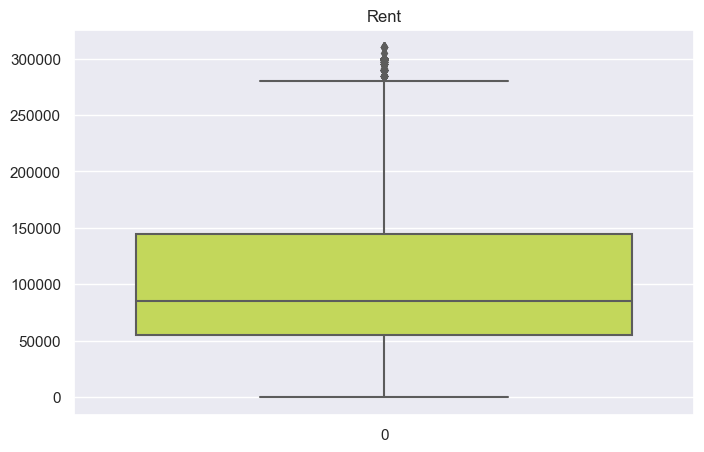

The meadian is:  2.0


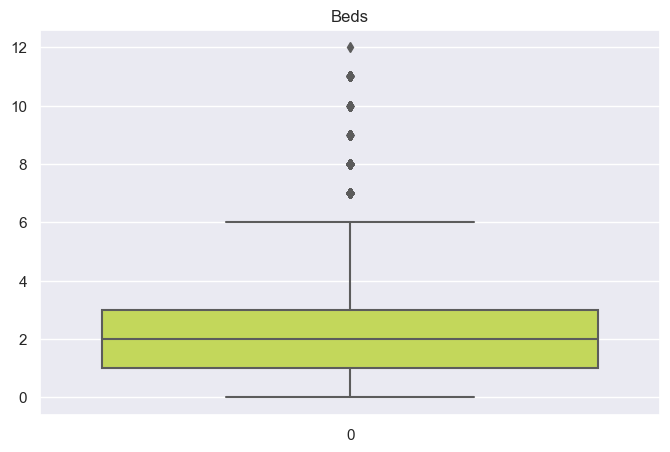

The meadian is:  2.0


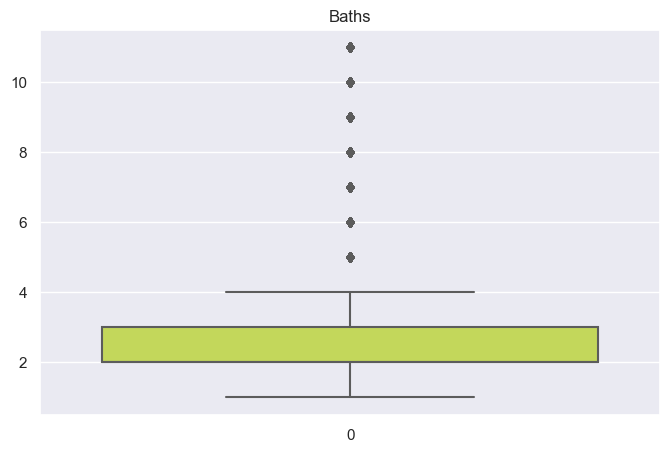

The meadian is:  1334.0


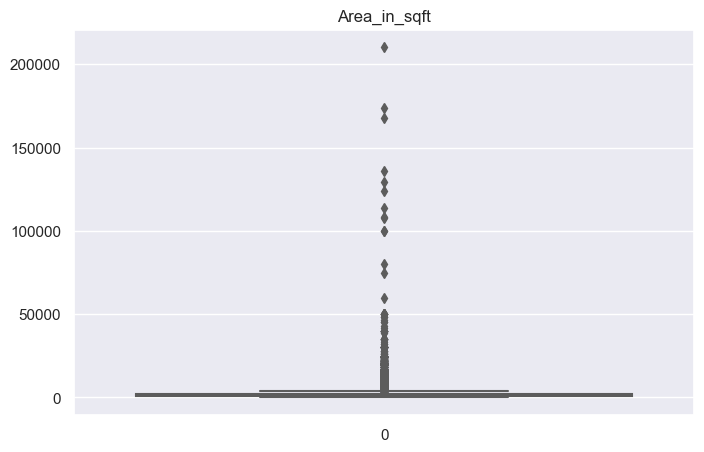

The meadian is:  71.42857143


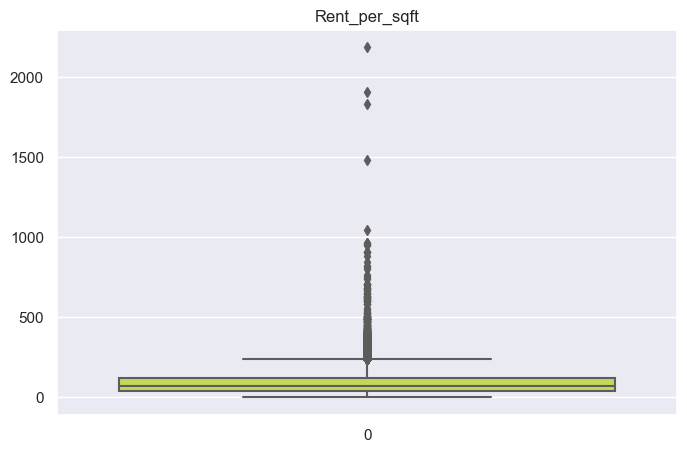

The meadian is:  52.0


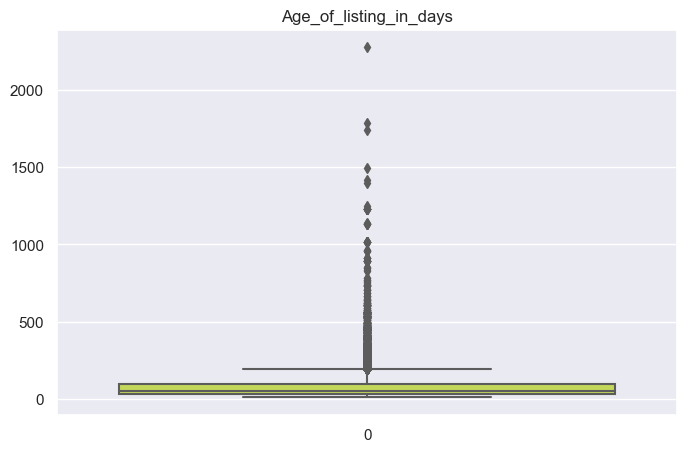

The meadian is:  25.0786415


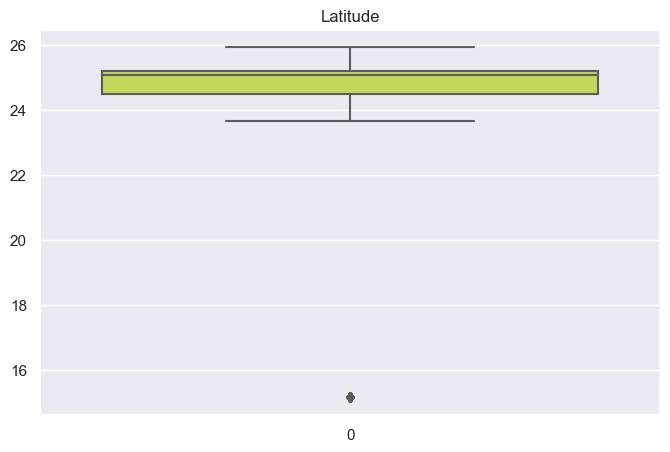

The meadian is:  55.23820949


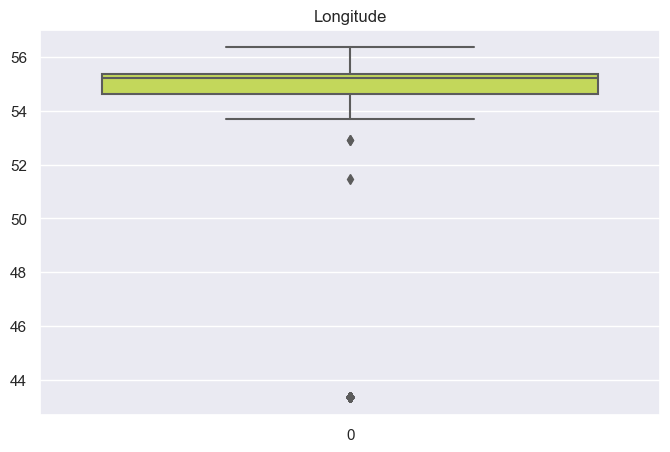

In [45]:
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

In [46]:
#function to find lower and Upper bound in categorical column with respect to "Rent"

def num_low_up(df, column_name):  
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column_name}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")


In [47]:
num_low_up(raw_data, 'Beds')
num_low_up(raw_data, 'Baths')
num_low_up(raw_data, 'Area_in_sqft')
num_low_up(raw_data, 'Rent_per_sqft')
num_low_up(raw_data, 'Age_of_listing_in_days')
num_low_up(raw_data, 'Latitude')
num_low_up(raw_data, 'Longitude')

Beds: Lower Bound = -2.0, Upper Bound = 6.0
Baths: Lower Bound = 0.5, Upper Bound = 4.5
Area_in_sqft: Lower Bound = -1070.0, Upper Bound = 4050.0
Rent_per_sqft: Lower Bound = -77.780674, Upper Bound = 236.24186408
Age_of_listing_in_days: Lower Bound = -67.5, Upper Bound = 192.5
Latitude: Lower Bound = 23.437029000000003, Upper Bound = 26.2545474
Longitude: Lower Bound = 53.476635650000006, Upper Bound = 56.49193285


In [48]:
#function to find and replace outliers

def num_outlier_replace(df, column,lowerbound, upperbound):
    
    # Find rows with outlier
    filtered_data = df[(df[column] < lowerbound) | (df[column] > upperbound)]
    print(f"Outliers before replacement for {column}: {filtered_data.shape}")
        
    # Median rent for the current type
    median = df[column].median()
    
    if df[column].dtype == "int64":
        
        # Replace values  lower than lowerbound or higher than upperbound with the median 
        
        median_whole = int(median)
        df.loc[((df[column] < lowerbound) | (df[column] > upperbound))] = median_whole
        
    else:
        # Replace values  lower than lowerbound or higher than upperbound with the median rent
        df.loc[((df[column] < lowerbound) | (df[column] > upperbound))] = median

    # Check if values are replaced
    filtered_data_after = df[((df[column] < lowerbound) | (df[column] > upperbound))]
    print(f"Outliers after replacement for {column}: {filtered_data_after.shape}")
    
    return df

In [49]:
num_outlier_replace(raw_data,'Beds',-2,6)
num_outlier_replace(raw_data,'Baths',0.5,4.5)
num_outlier_replace(raw_data,'Area_in_sqft',-1070,4050)
num_outlier_replace(raw_data,'Rent_per_sqft',-78,236)
num_outlier_replace(raw_data,'Latitude',-67,192)
num_outlier_replace(raw_data,'Longitude',53,56)

Outliers before replacement for Beds: (939, 14)
Outliers after replacement for Beds: (0, 14)
Outliers before replacement for Baths: (7880, 14)
Outliers after replacement for Baths: (0, 14)
Outliers before replacement for Area_in_sqft: (2718, 14)
Outliers after replacement for Area_in_sqft: (0, 14)
Outliers before replacement for Rent_per_sqft: (4866, 14)
Outliers after replacement for Rent_per_sqft: (0, 14)
Outliers before replacement for Latitude: (0, 14)
Outliers after replacement for Latitude: (0, 14)
Outliers before replacement for Longitude: (13876, 14)
Outliers after replacement for Longitude: (0, 14)


Address         Rent  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000.0000   
1                    Water's Edge, Yas Island, Abu Dhabi  140000.0000   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000.0000   
3      Marina Heights, Marina Square, Al Reem Island,...  220000.0000   
4                                                55.2075      55.2075   
...                                                  ...          ...   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000.0000   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000.0000   
73739                  King Faisal Street, Umm Al Quwain   50000.0000   
73740                           Al Maqtaa, Umm Al Quwain   37000.0000   
73741                             Al Rass, Umm Al Quwain   11000.0000   

          Beds    Baths       Type  Area_in_sqft  Rent_per_sqft Rent_category  \
0       3.0000   4.0000  Apartment     1785.0000      69.467787        Medium   
1       3.0000   4.0000  Apartment     1422.0000      98.452883        Medium   
2       2.0000   3.0000  Apartment     1314.0000      75.342466        Medium   
3       3.0000   4.0000  Penthouse     3843.0000      57.246942          High   
4      55.2075  55.2075    55.2075       55.2075      55.207500       55.2075   
...        ...      ...        ...           ...            ...           ...   
73737   0.0000   1.0000  Apartment      419.0000      33.412888           Low   
73738   0.0000   1.0000  Apartment      500.0000      28.000000           Low   
73739   3.0000   4.0000  Apartment     2000.0000      25.000000           Low   
73740   1.0000   2.0000  Apartment      989.0000      37.411527           Low   
73741   0.0000   1.0000  Apartment      300.0000      36.666667           Low   

        Furnishing  Age_of_listing_in_days              Location  \
0      Unfurnished                 45.0000        Al Reem Island   
1      Unfurnished                 44.0000            Yas Island   
2        Furnished                 31.0000         Al Raha Beach   
3      Unfurnished                 57.0000        Al Reem Island   
4          55.2075                 55.2075               55.2075   
...            ...                     ...                   ...   
73737  Unfurnished                129.0000            Al Salamah   
73738  Unfurnished                129.0000  Umm Al Quwain Marina   
73739  Unfurnished                110.0000    King Faisal Street   
73740  Unfurnished                181.0000             Al Maqtaa   
73741  Unfurnished                 69.0000               Al Rass   

                City   Latitude  Longitude  
0          Abu Dhabi  24.493598  54.407841  
1          Abu Dhabi  24.494022  54.607372  
2          Abu Dhabi  24.485931  54.600939  
3          Abu Dhabi  24.493598  54.407841  
4            55.2075  55.207500  55.207500  
...              ...        ...        ...  
73737  Umm Al Quwain  25.493412  55.575994  
73738  Umm Al Quwain  25.527959  55.606527  
73739  Umm Al Quwain  25.078641  55.238209  
73740  Umm Al Quwain  25.078641  55.238209  
73741  Umm Al Quwain  25.078641  55.238209  

[73742 rows x 14 columns]

The meadian is:  65000.0


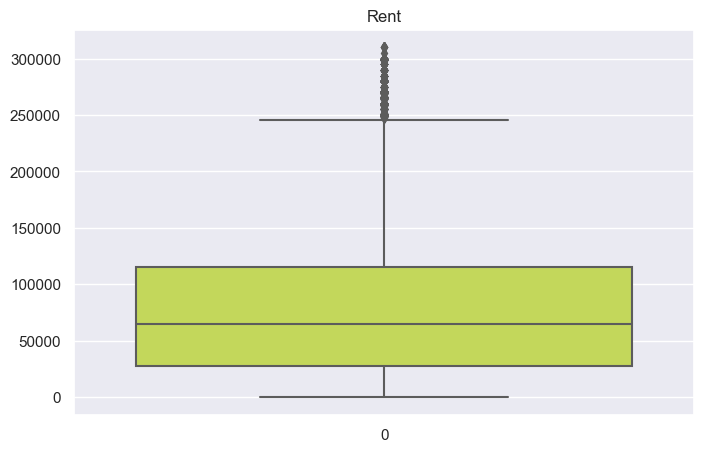

The meadian is:  2.0


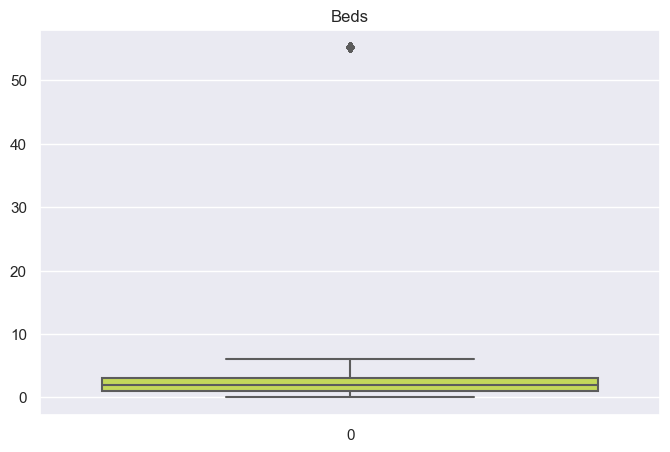

The meadian is:  2.0


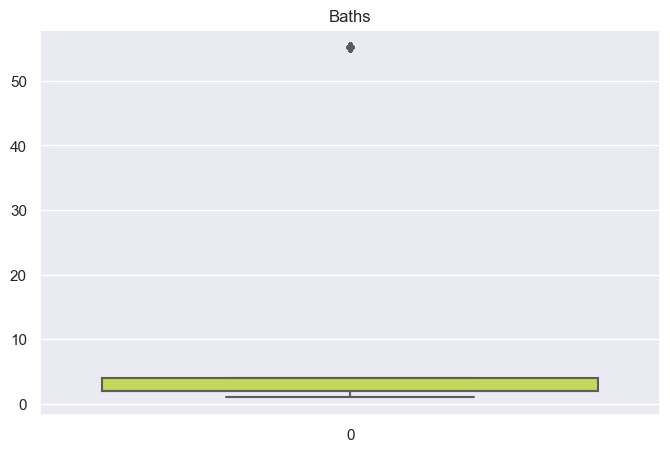

The meadian is:  960.0


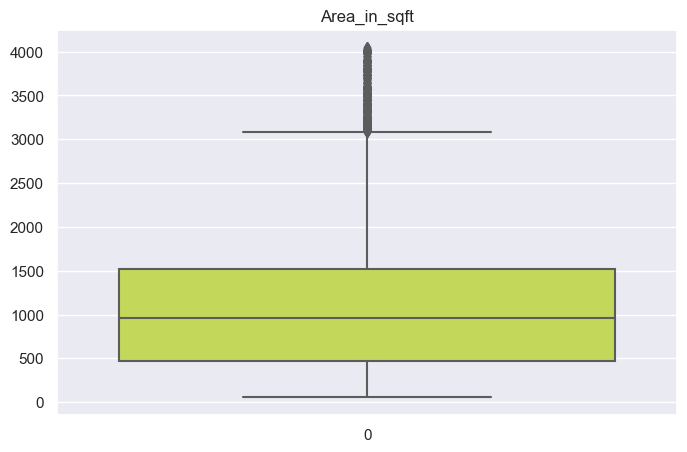

The meadian is:  62.17782649


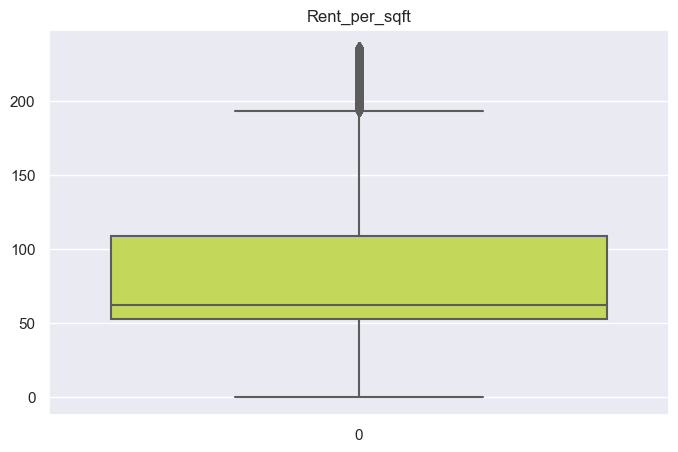

The meadian is:  55.2075004


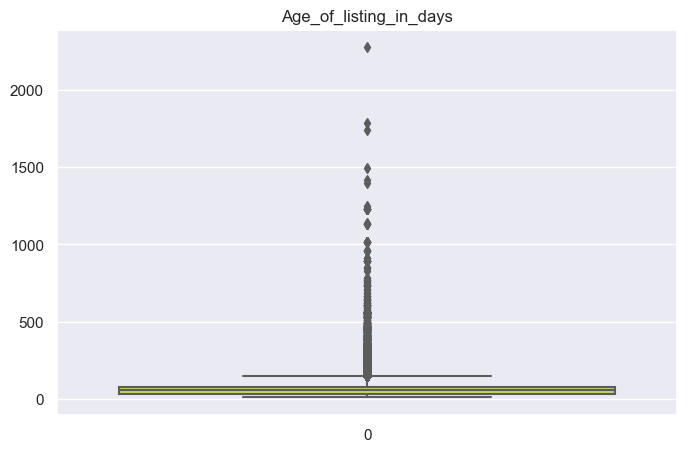

The meadian is:  25.1541673


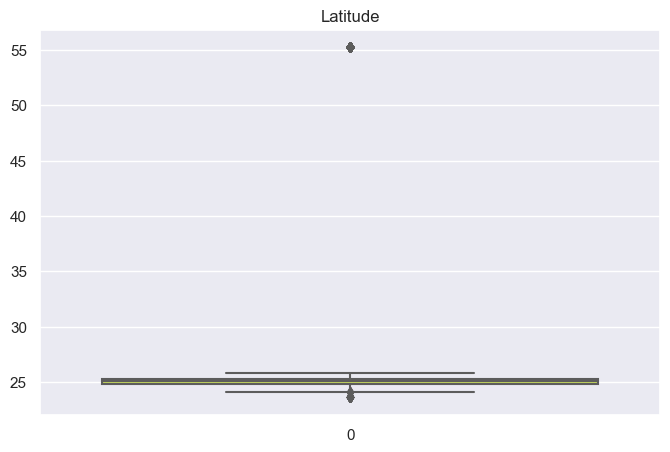

The meadian is:  55.2075004


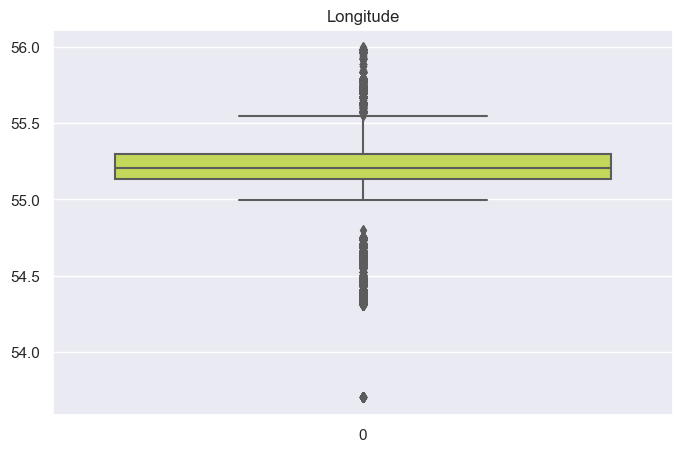

In [50]:
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

In [51]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  float64
 2   Beds                    73742 non-null  float64
 3   Baths                   73742 non-null  float64
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  float64
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Furnishing              73742 non-null  object 
 9   Age_of_listing_in_days  73742 non-null  float64
 10  Location                73742 non-null  object 
 11  City                    73742 non-null  object 
 12  Latitude                73742 non-null  float64
 13  Longitude               73742 non-null  float64
dtypes: float64(8), object(6)
memory usage:

In [52]:
raw_data = raw_data.drop(['Address','Location'], axis = 1)

In [53]:
raw_data.shape

(73742, 12)

In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    73742 non-null  float64
 1   Beds                    73742 non-null  float64
 2   Baths                   73742 non-null  float64
 3   Type                    73742 non-null  object 
 4   Area_in_sqft            73742 non-null  float64
 5   Rent_per_sqft           73742 non-null  float64
 6   Rent_category           73742 non-null  object 
 7   Furnishing              73742 non-null  object 
 8   Age_of_listing_in_days  73742 non-null  float64
 9   City                    73742 non-null  object 
 10  Latitude                73742 non-null  float64
 11  Longitude               73742 non-null  float64
dtypes: float64(8), object(4)
memory usage: 6.8+ MB


## 3.7. Converting the categorical values into numerical representation 

In [55]:
new_raw_data = pd.get_dummies(raw_data, columns = ['Type', 'Rent_category','Furnishing','City'])

new_raw_data.head()

Rent     Beds    Baths  Area_in_sqft  Rent_per_sqft  \
0  124000.0000   3.0000   4.0000     1785.0000      69.467787   
1  140000.0000   3.0000   4.0000     1422.0000      98.452883   
2   99000.0000   2.0000   3.0000     1314.0000      75.342466   
3  220000.0000   3.0000   4.0000     3843.0000      57.246942   
4      55.2075  55.2075  55.2075       55.2075      55.207500   

   Age_of_listing_in_days   Latitude  Longitude  Type_55.2075004  \
0                 45.0000  24.493598  54.407841                0   
1                 44.0000  24.494022  54.607372                0   
2                 31.0000  24.485931  54.600939                0   
3                 57.0000  24.493598  54.407841                0   
4                 55.2075  55.207500  55.207500                1   

   Type_Apartment  ...  Furnishing_Unfurnished  City_55.2075004  \
0               1  ...                       1                0   
1               1  ...                       1                0   
2               1  ...                       0                0   
3               0  ...                       1                0   
4               0  ...                       0                1   

   City_Abu Dhabi  City_Ajman  City_Al Ain  City_Dubai  City_Fujairah  \
0               1           0            0           0              0   
1               1           0            0           0              0   
2               1           0            0           0              0   
3               1           0            0           0              0   
4               0           0            0           0              0   

   City_Ras Al Khaimah  City_Sharjah  City_Umm Al Quwain  
0                    0             0                   0  
1                    0             0                   0  
2                    0             0                   0  
3                    0             0                   0  
4                    0             0                   0  

[5 rows x 34 columns]

In [56]:
new_raw_data = new_raw_data.drop(['Type_55.2075004','Rent_category_55.2075004','City_55.2075004'], 
                                 axis = 1)

In [57]:
new_raw_data.shape

(73742, 31)

In [58]:
new_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rent                       73742 non-null  float64
 1   Beds                       73742 non-null  float64
 2   Baths                      73742 non-null  float64
 3   Area_in_sqft               73742 non-null  float64
 4   Rent_per_sqft              73742 non-null  float64
 5   Age_of_listing_in_days     73742 non-null  float64
 6   Latitude                   73742 non-null  float64
 7   Longitude                  73742 non-null  float64
 8   Type_Apartment             73742 non-null  uint8  
 9   Type_Hotel Apartment       73742 non-null  uint8  
 10  Type_Penthouse             73742 non-null  uint8  
 11  Type_Residential Building  73742 non-null  uint8  
 12  Type_Residential Floor     73742 non-null  uint8  
 13  Type_Residential Plot      73742 non-null  uin

In [59]:
corr = new_raw_data.corr(numeric_only = True)
corr["Rent"].sort_values(ascending = False)

Rent                         1.000000
Rent_category_High           0.743999
Area_in_sqft                 0.632465
City_Dubai                   0.580392
Rent_per_sqft                0.571610
Type_Townhouse               0.291095
Furnishing_Furnished         0.287270
Type_Villa                   0.255893
Furnishing_Unfurnished       0.225021
Type_Apartment               0.218869
Rent_category_Medium         0.206606
Type_Hotel Apartment         0.076446
City_Abu Dhabi               0.074191
Age_of_listing_in_days       0.031044
Type_Penthouse               0.030410
Type_Villa Compound          0.012784
Type_Residential Building    0.009985
Type_Residential Floor       0.000456
Type_Residential Plot       -0.001635
City_Fujairah               -0.004504
City_Umm Al Quwain          -0.019341
City_Ras Al Khaimah         -0.025824
City_Al Ain                 -0.050842
Longitude                   -0.117268
City_Ajman                  -0.130033
City_Sharjah                -0.200951
Rent_categor

In [60]:
corr.style.background_gradient(cmap='coolwarm')

## 3.8. Feature Importance

Steps of Running Feature Importance:

1. Split the data into X & y

2. Run a Tree-based estimators (i.e. decision trees & random forests)

3. Run Feature Importance

Importance of a feature derived by calculating the increase in the model’s prediction error after permuting the feature

In [61]:
# Split the data into X & y

X = new_raw_data.drop(['Rent'], axis = 1).values
X_columns = new_raw_data.drop(['Rent'], axis = 1)
y = new_raw_data['Rent'].astype(int)

print(X.shape)
print(y.shape)

(73742, 30)
(73742,)


In [62]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [63]:
dt.feature_importances_

array([1.14452075e-02, 1.18655009e-01, 2.12736216e-01, 2.36911806e-01,
       6.01939169e-04, 3.50998156e-02, 1.22487352e-02, 9.22985944e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.31443180e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.11793848e-01, 1.48239875e-01, 0.00000000e+00,
       1.20012149e-03, 0.00000000e+00, 3.67240988e-05, 0.00000000e+00,
       0.00000000e+00, 4.09591950e-04, 0.00000000e+00, 0.00000000e+00,
       7.68193440e-05, 0.00000000e+00])

In [64]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('Rent', axis=1).columns,    
    class_names=new_raw_data['Rent'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [65]:
# Calculating FI
for i, column in enumerate(new_raw_data.drop('Rent', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index(drop= True)            
final_fi

Importance of feature Beds:, 0.011
Importance of feature Baths:, 0.119
Importance of feature Area_in_sqft:, 0.213
Importance of feature Rent_per_sqft:, 0.237
Importance of feature Age_of_listing_in_days:, 0.001
Importance of feature Latitude:, 0.035
Importance of feature Longitude:, 0.012
Importance of feature Type_Apartment:, 0.009
Importance of feature Type_Hotel Apartment:, 0.000
Importance of feature Type_Penthouse:, 0.000
Importance of feature Type_Residential Building:, 0.000
Importance of feature Type_Residential Floor:, 0.000
Importance of feature Type_Residential Plot:, 0.000
Importance of feature Type_Townhouse:, 0.001
Importance of feature Type_Villa:, 0.000
Importance of feature Type_Villa Compound:, 0.000
Importance of feature Rent_category_High:, 0.000
Importance of feature Rent_category_Low:, 0.212
Importance of feature Rent_category_Medium:, 0.148
Importance of feature Furnishing_55.2075004:, 0.000
Importance of feature Furnishing_Furnished:, 0.001
Importance of feature

Variable  Feature Importance Score
0               Rent_per_sqft                  0.236912
1                Area_in_sqft                  0.212736
2           Rent_category_Low                  0.211794
3        Rent_category_Medium                  0.148240
4                       Baths                  0.118655
5                    Latitude                  0.035100
6                   Longitude                  0.012249
7                        Beds                  0.011445
8              Type_Apartment                  0.009230
9              Type_Townhouse                  0.001314
10       Furnishing_Furnished                  0.001200
11     Age_of_listing_in_days                  0.000602
12                 City_Dubai                  0.000410
13               City_Sharjah                  0.000077
14             City_Abu Dhabi                  0.000037
15              City_Fujairah                  0.000000
16                 City_Ajman                  0.000000
17                City_Al Ain                  0.000000
18        City_Ras Al Khaimah                  0.000000
19     Furnishing_Unfurnished                  0.000000
20        Type_Villa Compound                  0.000000
21      Furnishing_55.2075004                  0.000000
22         Rent_category_High                  0.000000
23                 Type_Villa                  0.000000
24      Type_Residential Plot                  0.000000
25     Type_Residential Floor                  0.000000
26  Type_Residential Building                  0.000000
27             Type_Penthouse                  0.000000
28       Type_Hotel Apartment                  0.000000
29         City_Umm Al Quwain                  0.000000

# 4. Splitting the Raw Data - Hold-out validation

In [66]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58993, 30)
(14749, 30)
(58993,)
(14749,)


In [67]:
# feature scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_steps = [
    ('scaler', StandardScaler())]

In [92]:
# training with linear regression

from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', lm)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [93]:
# Model Accuracy on training dataset

print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred_train) )
print('The Accuracy r2  on the test dataset prediction is: ',r2_score(y_test,y_pred_test) )  

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))


The Accuracy r2  on the training dataset prediction is:  0.8270681875125143
The Accuracy r2  on the test dataset prediction is:  0.8263753859996604

The RMSE  on the training dataset is:  27516.728753159365
The RMSE  on the testing dataset is:  27303.14417846756

The MAE  on the training dataset is:  16118.974495053195
The MAE  on the testing dataset is:  16029.563207533847


In [94]:
# training with KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', neigh)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [95]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.9971337572497134
The R2 score on the test dataset prediction is:  0.9888378794289628

The RMSE  on the training dataset is:  3542.548793652667
The RMSE  on the testing dataset is:  6922.77745269334

The MAE  on the training dataset is:  360.5556930483278
The MAE  on the testing dataset is:  884.5743101227201


In [96]:
# training with neural network regressor

from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', nn)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

E:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [97]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.8277971704603203
The R2 score on the test dataset prediction is:  0.8279336821551373

The RMSE  on the training dataset is:  27458.670001503473
The RMSE  on the testing dataset is:  27180.343963605912

The MAE  on the training dataset is:  15550.386876720257
The MAE  on the testing dataset is:  15410.380797165206


In [98]:
# Training with random forest regressor
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(max_depth=2, random_state=0)

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', random)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [99]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.775714750747588
The R2 score on the test dataset prediction is:  0.7728332346539656

The RMSE  on the training dataset is:  31337.165562131147
The RMSE  on the testing dataset is:  31230.53419749404

The MAE  on the training dataset is:  24291.94527690539
The MAE  on the testing dataset is:  24168.365454695202


# 7. Trying Regression with top 10 correlation variables with respect to Rent

In [100]:
final_fi['Variable'][0:8].values

array(['Rent_per_sqft', 'Area_in_sqft', 'Rent_category_Low',
       'Rent_category_Medium', 'Baths', 'Latitude', 'Longitude', 'Beds'],
      dtype=object)

In [101]:
top_10_columns = corr["Rent"].sort_values(ascending=False).index[1:11]
print(top_10_columns)

Index(['Rent_category_High', 'Area_in_sqft', 'City_Dubai', 'Rent_per_sqft',
       'Type_Townhouse', 'Furnishing_Furnished', 'Type_Villa',
       'Furnishing_Unfurnished', 'Type_Apartment', 'Rent_category_Medium'],
      dtype='object')


In [102]:
# Split the data into X & y

X2 = new_raw_data[top_10_columns].values
y2 = new_raw_data['Rent'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

# feature scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_steps = [
    ('scaler', StandardScaler())]

(73742, 30)
(73742,)


In [103]:
# training with linear regression

from sklearn.linear_model import LinearRegression
lm2 = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', lm2)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [104]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.8270681875125143
The R2 score on the test dataset prediction is:  0.8263753859996604

The RMSE  on the training dataset is:  27516.728753159365
The RMSE  on the testing dataset is:  27303.14417846756

The MAE  on the training dataset is:  16118.974495053195
The MAE  on the testing dataset is:  16029.563207533847


In [105]:
# training with neural network regressor

from sklearn.neural_network import MLPRegressor
nn2 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', nn2)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

E:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.8261074008732514
The R2 score on the test dataset prediction is:  0.826085831802485

The RMSE  on the training dataset is:  27593.062556368153
The RMSE  on the testing dataset is:  27325.901454786173

The MAE  on the training dataset is:  15587.977907271843
The MAE  on the testing dataset is:  15455.243583545865


In [107]:
# Training with random forest regressor

from sklearn.ensemble import RandomForestRegressor
random2 = RandomForestRegressor(max_depth=2, random_state=0)

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', random2)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [108]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.775714750747588
The R2 score on the test dataset prediction is:  0.7728332346539656

The RMSE  on the training dataset is:  31337.165562131147
The RMSE  on the testing dataset is:  31230.53419749404

The MAE  on the training dataset is:  24291.94527690539
The MAE  on the testing dataset is:  24168.365454695202


In [109]:
# training with KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
neigh2 = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=preprocessing_steps + [('regressor', neigh2)])

pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [110]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', pipeline.score(X_train, y_train))
print('The R2 score on the test dataset prediction is: ', pipeline.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test))

The R2 score on the training dataset prediction is:  0.9971337572497134
The R2 score on the test dataset prediction is:  0.9888378794289628

The RMSE  on the training dataset is:  3542.548793652667
The RMSE  on the testing dataset is:  6922.77745269334

The MAE  on the training dataset is:  360.5556930483278
The MAE  on the testing dataset is:  884.5743101227201


### KNeighbors Regressor was able to pull r2 score of 99.7% on training and 98.8% on testing.